# Part 2 Exploratory Data Analysis

In [44]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import os 
import datetime as dt
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# Reading and storing the csv file in a Data Frame
df=pd.read_csv('cleanedDataCo.csv')
df.head()

,Type,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,Profits
0,DEBIT,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,Smart watch,327.75,2018-02-03 22:56:00,Standard Class,Profit
1,TRANSFER,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,...,-249.089996,South Asia,Rajastán,PENDING,1360,Smart watch,327.75,2018-01-18 12:27:00,Standard Class,Loss
2,CASH,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,...,-247.779999,South Asia,Rajastán,CLOSED,1360,Smart watch,327.75,2018-01-17 12:06:00,Standard Class,Loss
3,DEBIT,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,...,22.860001,Oceania,Queensland,COMPLETE,1360,Smart watch,327.75,2018-01-16 11:45:00,Standard Class,Profit
4,PAYMENT,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,Smart watch,327.75,2018-01-15 11:24:00,Standard Class,Profit


In [46]:
# Checking all the columns present 
df.columns

Index(['Type', 'Delivery Status', 'Late_delivery_risk', 'Category Id',
       'Category Name', 'Customer City', 'Customer Country', 'Customer Id',
       'Customer Segment', 'Customer State', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Name',
       'Product Price', 'shipping date (DateOrders)', 'Shipping Mode',
       'Profits'],
      dtype='object')

In [47]:
df.describe()

,Late_delivery_risk,Category Id,Customer Id,Department Id,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Price
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,0.548291,31.851451,6691.379495,5.443460,36221.894903,20.664741,0.101668,2.127638,203.772096,183.107609,21.974989,692.509764,141.232550
std,0.497664,15.640064,4162.918106,1.629246,21045.379569,21.800901,0.070415,1.453451,132.273077,120.043670,104.433526,336.446807,139.732492
min,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,9.990000,7.490000,-4274.979980,19.000000,9.990000
25%,0.000000,18.000000,3258.500000,4.000000,18057.000000,5.400000,0.040000,1.000000,119.980003,104.379997,7.000000,403.000000,50.000000
50%,1.000000,29.000000,6457.000000,5.000000,36140.000000,14.000000,0.100000,1.000000,199.919998,163.990005,31.520000,627.000000,59.990002
75%,1.000000,45.000000,9779.000000,7.000000,54144.000000,29.990000,0.160000,3.000000,299.950012,247.399994,64.800003,1004.000000,199.990005
max,1.000000,76.000000,20757.000000,12.000000,77204.000000,500.000000,0.250000,5.000000,1999.989990,1939.989990,911.799988,1363.000000,1999.989990


## Sales and Profit Analysis For The Top 10 Regions 

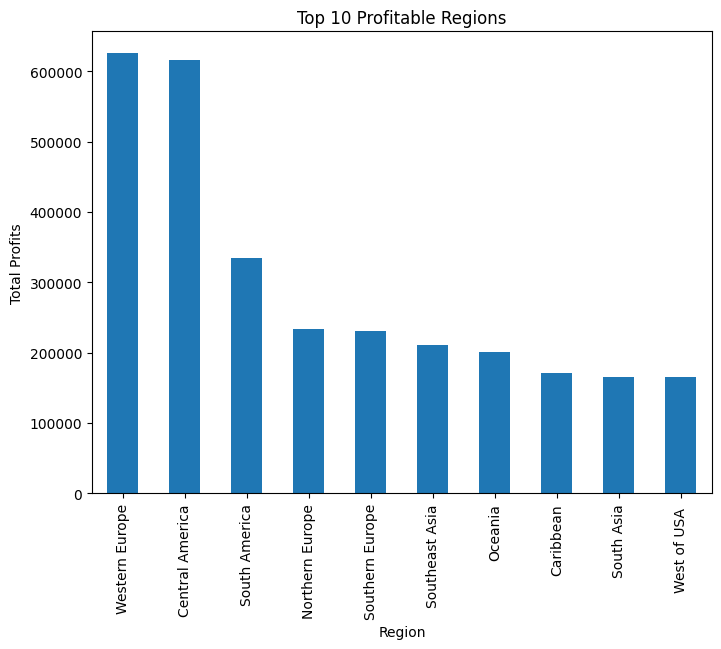

In [48]:
#ploting a bar graph for most profitable regions 
df1 = df.groupby(['Order Region'])['Order Profit Per Order'].sum().sort_values(ascending=False).head(10)
df1.plot(kind='bar', figsize=(8,6), title='Top 10 Profitable Regions')
plt.xlabel('Region')
plt.ylabel('Total Profits')
plt.show()

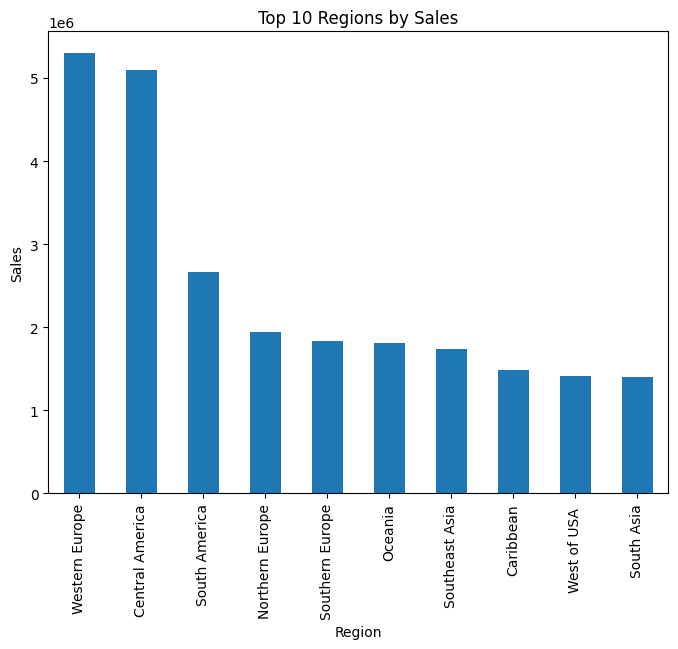

In [49]:
#ploting a bar graph for most sales in regions 
df1 = df.groupby(['Order Region'])['Order Item Total'].sum().sort_values(ascending=False).head(10)
df1.plot(kind='bar', figsize=(8,6), title='Top 10 Regions by Sales')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

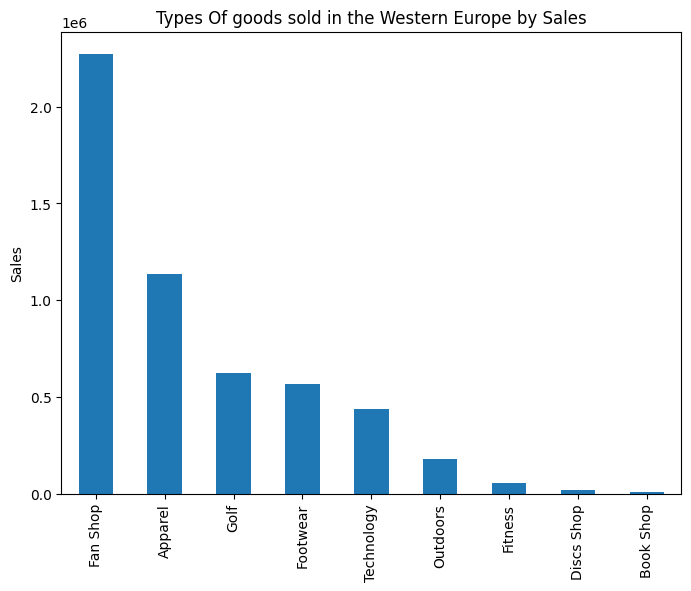

In [50]:
df1=df[df['Order Region']=='Western Europe']
df1 = df1.groupby(['Department Name'])['Order Item Total'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the Western Europe by Sales')
plt.xlabel('')
plt.ylabel('Sales')
plt.show()

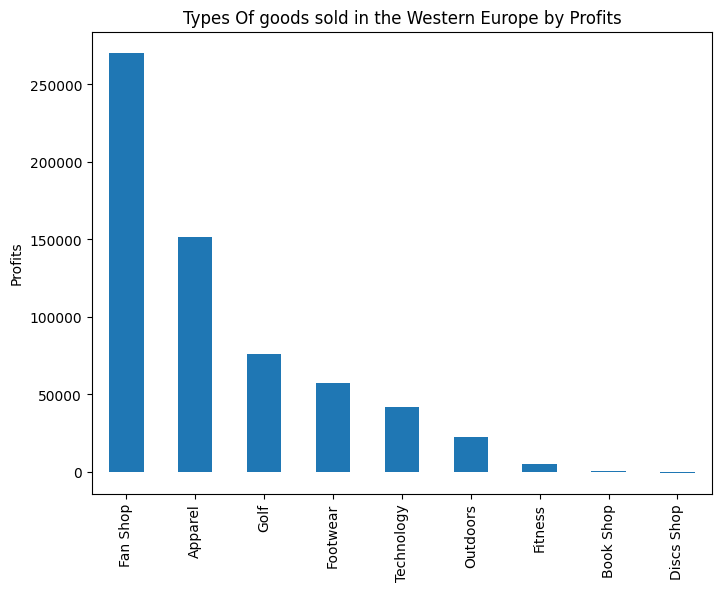

In [51]:
#ploting a bar graph for types Of goods sold in the Western Europe by Profits
df1=df[df['Order Region']=='Western Europe']
df1 = df1.groupby(['Department Name'])['Order Profit Per Order'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the Western Europe by Profits')
plt.xlabel('')
plt.ylabel('Profits')
plt.show()

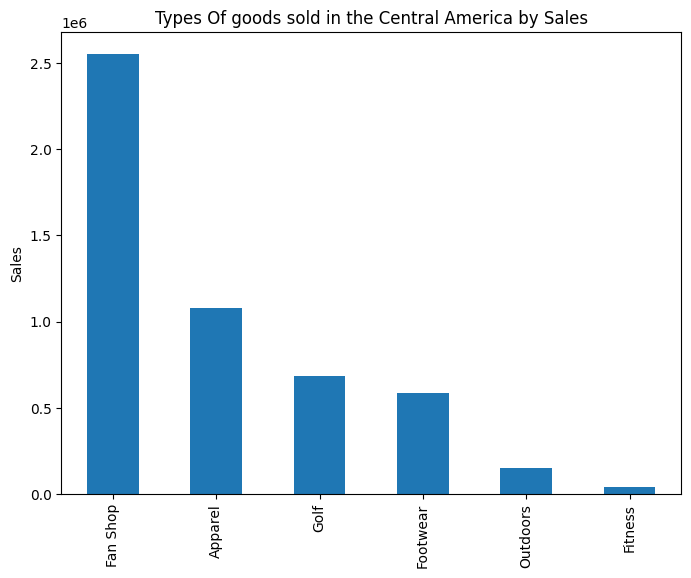

In [52]:
#ploting a bar graph for types Of goods sold in the Central America by Sales
df1=df[df['Order Region']=='Central America']
df1 = df1.groupby(['Department Name'])['Order Item Total'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the Central America by Sales')
plt.xlabel('')
plt.ylabel('Sales')
plt.show()

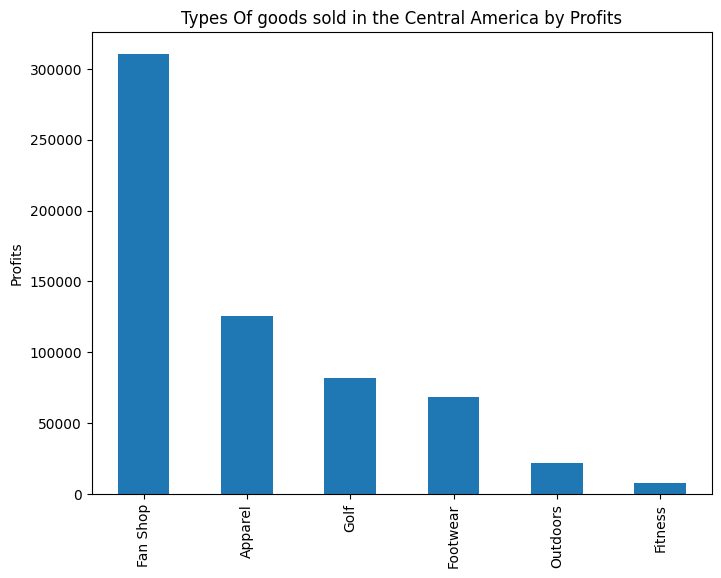

In [53]:
#ploting a bar graph for types Of goods sold in the Western Europe by Profits
df1=df[df['Order Region']=='Central America']
df1 = df1.groupby(['Department Name'])['Order Profit Per Order'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the Central America by Profits')
plt.xlabel('')
plt.ylabel('Profits')
plt.show()

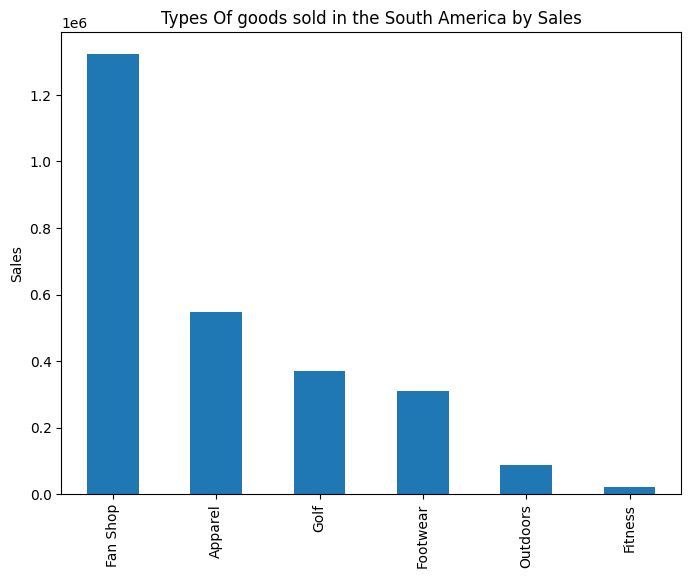

In [54]:
#ploting a bar graph for types Of goods sold in the Central America by Sales
df1=df[df['Order Region']=='South America']
df1 = df1.groupby(['Department Name'])['Order Item Total'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the South America by Sales')
plt.xlabel('')
plt.ylabel('Sales')
plt.show()

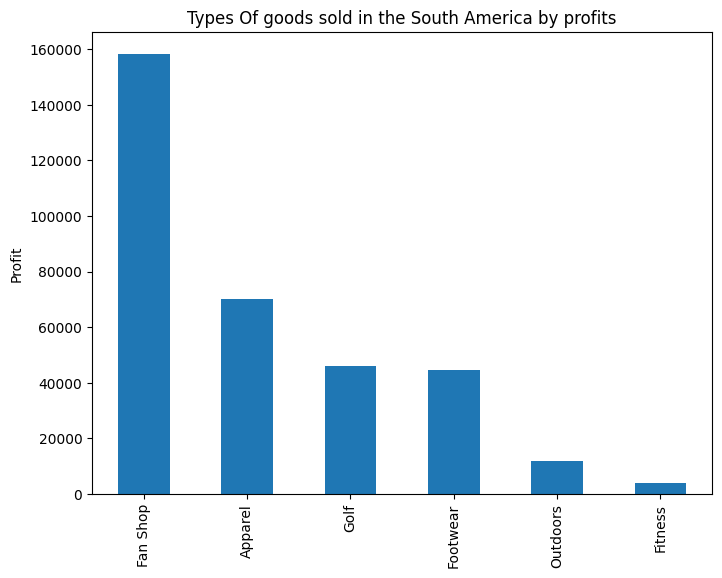

In [55]:
#ploting a bar graph for types Of goods sold in the Western Europe by Profits
df1=df[df['Order Region']=='South America']
df1 = df1.groupby(['Department Name'])['Order Profit Per Order'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the South America by profits')
plt.xlabel('')
plt.ylabel('Profit')
plt.show()

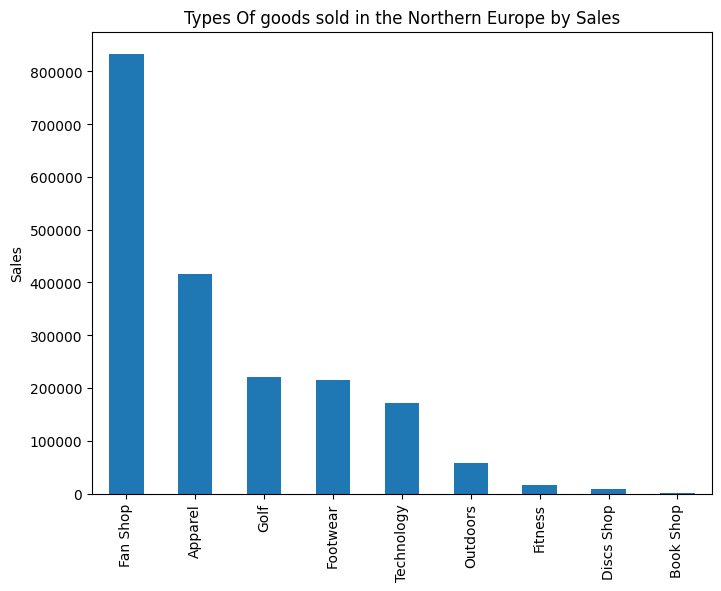

In [56]:
#ploting a bar graph for types Of goods sold in the Central America by Sales
df1=df[df['Order Region']=='Northern Europe']
df1 = df1.groupby(['Department Name'])['Order Item Total'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the Northern Europe by Sales')
plt.xlabel('')
plt.ylabel('Sales')
plt.show()

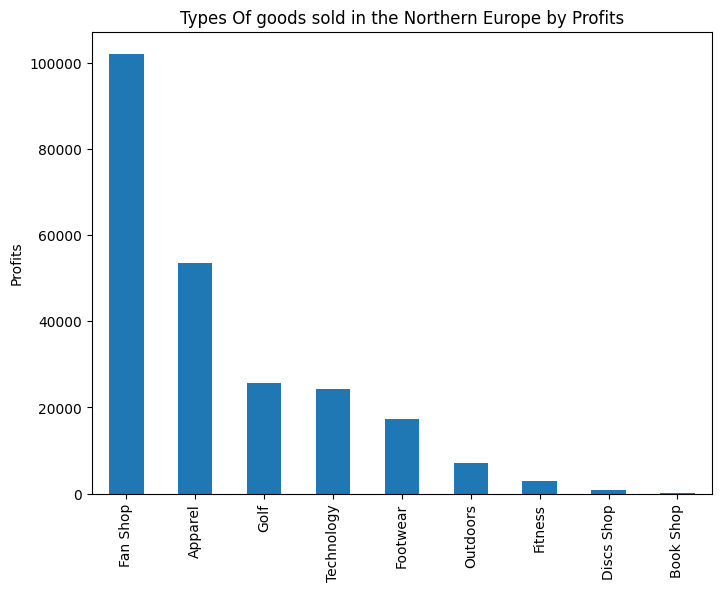

In [57]:
#ploting a bar graph for types Of goods sold in the Western Europe by Profits
df1=df[df['Order Region']=='Northern Europe']
df1 = df1.groupby(['Department Name'])['Order Profit Per Order'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the Northern Europe by Profits')
plt.xlabel('')
plt.ylabel('Profits')
plt.show()

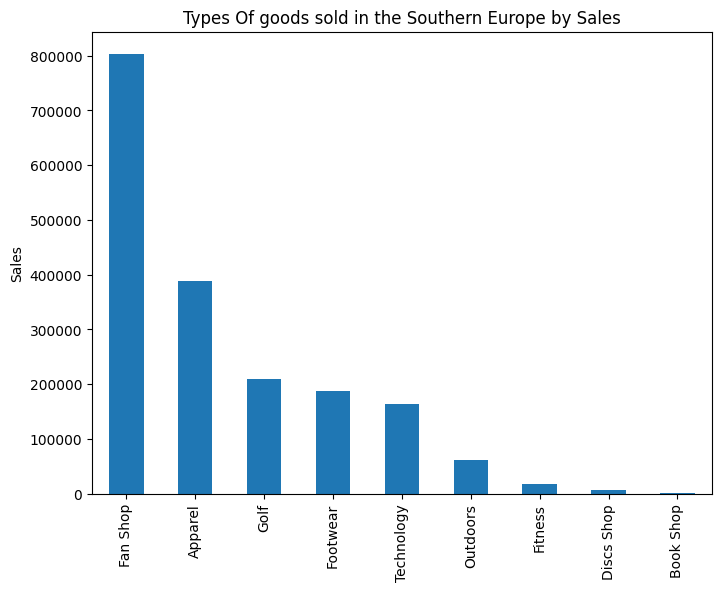

In [58]:
#ploting a bar graph for types Of goods sold in the Central America by Sales
df1=df[df['Order Region']=='Southern Europe']
df1 = df1.groupby(['Department Name'])['Order Item Total'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the Southern Europe by Sales')
plt.xlabel('')
plt.ylabel('Sales')
plt.show()

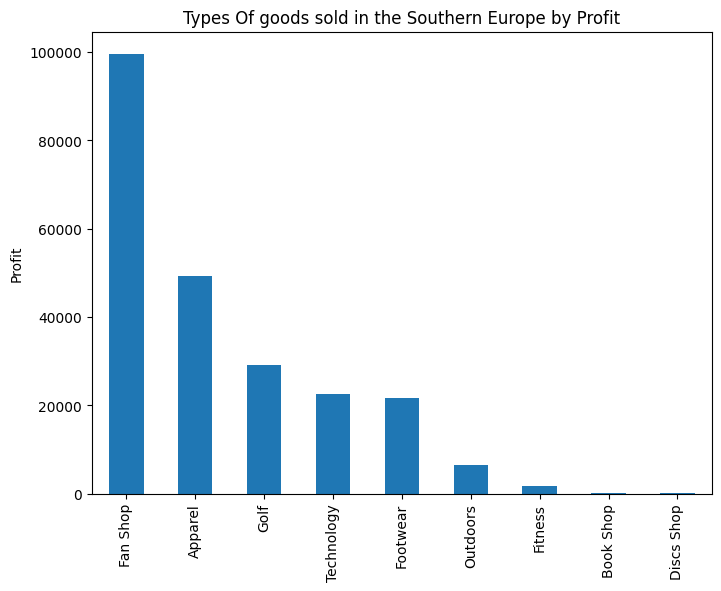

In [59]:
#ploting a bar graph for types Of goods sold in the Western Europe by Profits
df1=df[df['Order Region']=='Southern Europe']
df1 = df1.groupby(['Department Name'])['Order Profit Per Order'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the Southern Europe by Profit')
plt.xlabel('')
plt.ylabel('Profit')
plt.show()

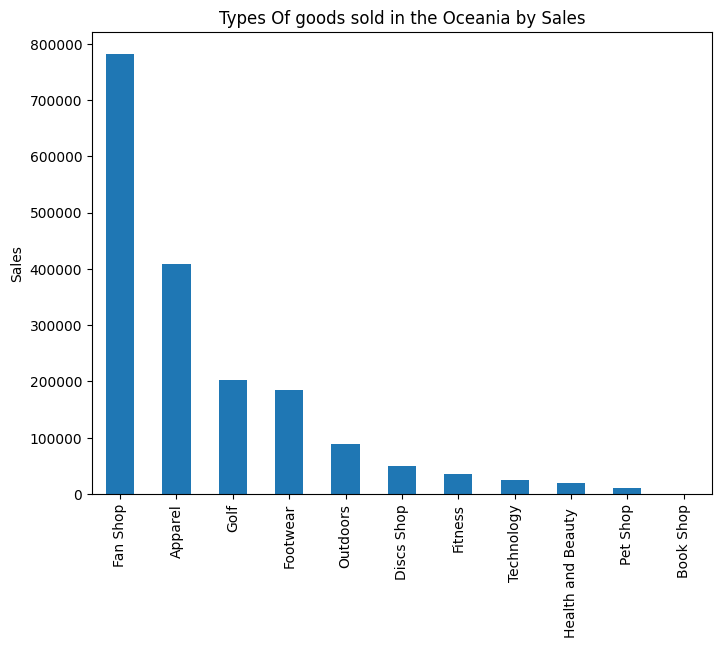

In [60]:
#ploting a bar graph for types Of goods sold in the Central America by Sales
df1=df[df['Order Region']=='Oceania']
df1 = df1.groupby(['Department Name'])['Order Item Total'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the Oceania by Sales')
plt.xlabel('')
plt.ylabel('Sales')
plt.show()

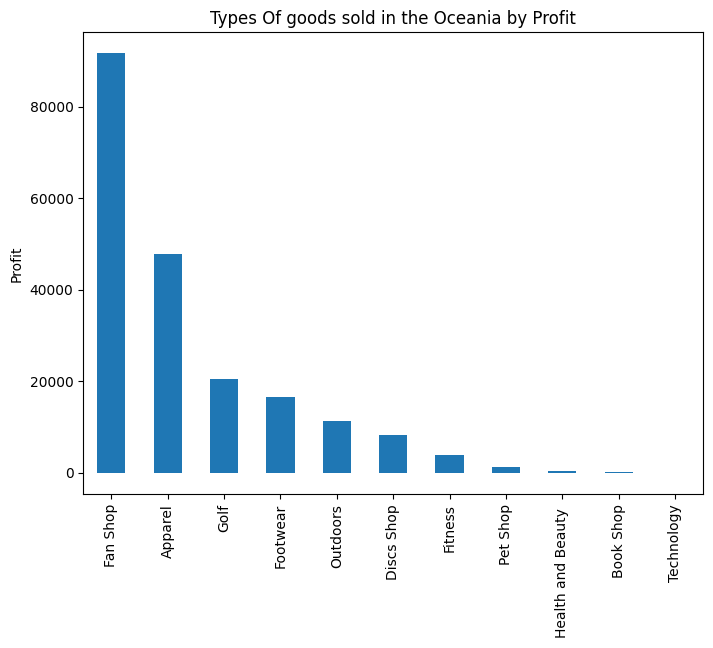

In [61]:
#ploting a bar graph for types Of goods sold in the Western Europe by Profits
df1=df[df['Order Region']=='Oceania']
df1 = df1.groupby(['Department Name'])['Order Profit Per Order'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the Oceania by Profit')
plt.xlabel('')
plt.ylabel('Profit')
plt.show()

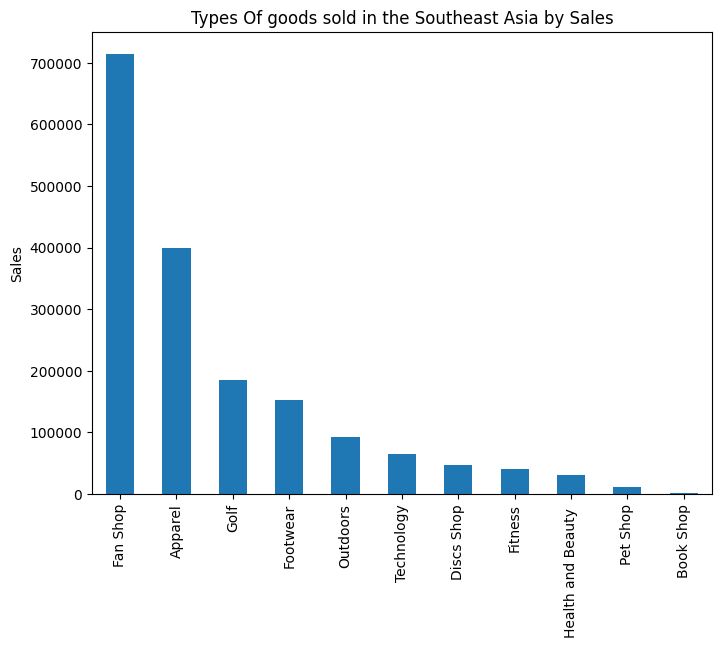

In [62]:
#ploting a bar graph for types Of goods sold in the Central America by Sales
df1=df[df['Order Region']=='Southeast Asia']
df1 = df1.groupby(['Department Name'])['Order Item Total'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the Southeast Asia by Sales')
plt.xlabel('')
plt.ylabel('Sales')
plt.show()

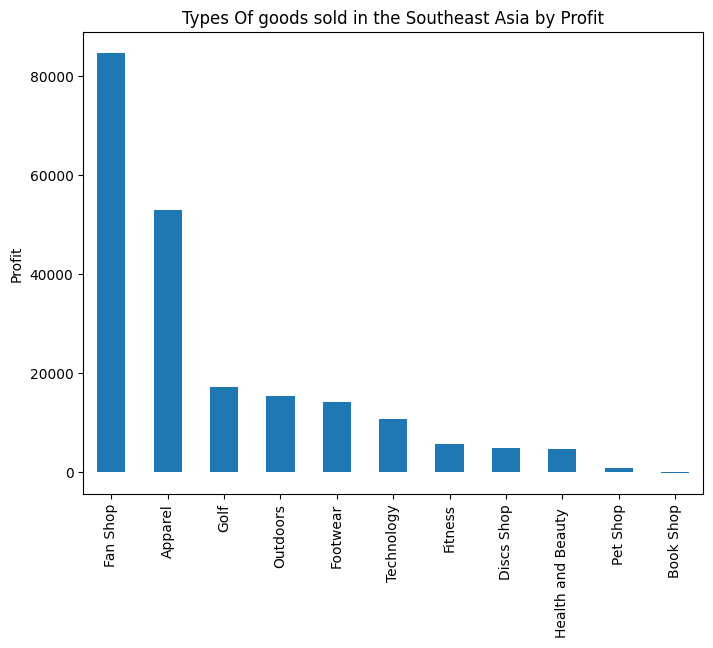

In [63]:
#ploting a bar graph for types Of goods sold in the Western Europe by Profits
df1=df[df['Order Region']=='Southeast Asia']
df1 = df1.groupby(['Department Name'])['Order Profit Per Order'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the Southeast Asia by Profit')
plt.xlabel('')
plt.ylabel('Profit')
plt.show()

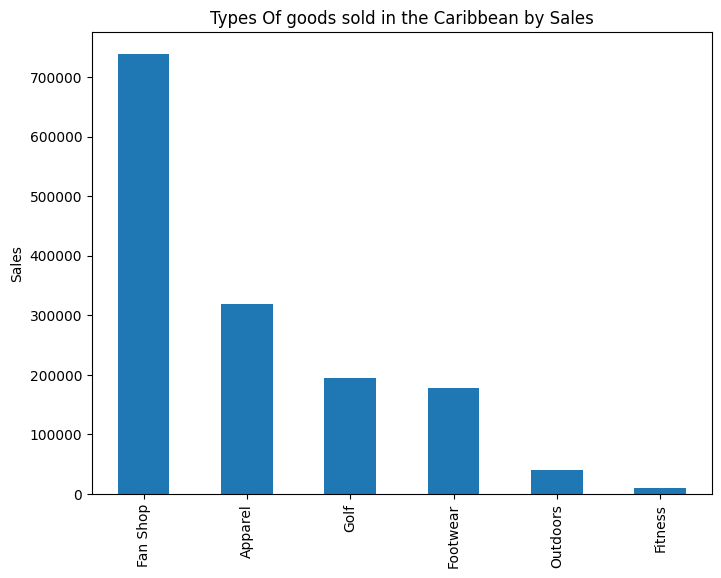

In [64]:
#ploting a bar graph for types Of goods sold in the Central America by Sales
df1=df[df['Order Region']=='Caribbean']
df1 = df1.groupby(['Department Name'])['Order Item Total'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the Caribbean by Sales')
plt.xlabel('')
plt.ylabel('Sales')
plt.show()

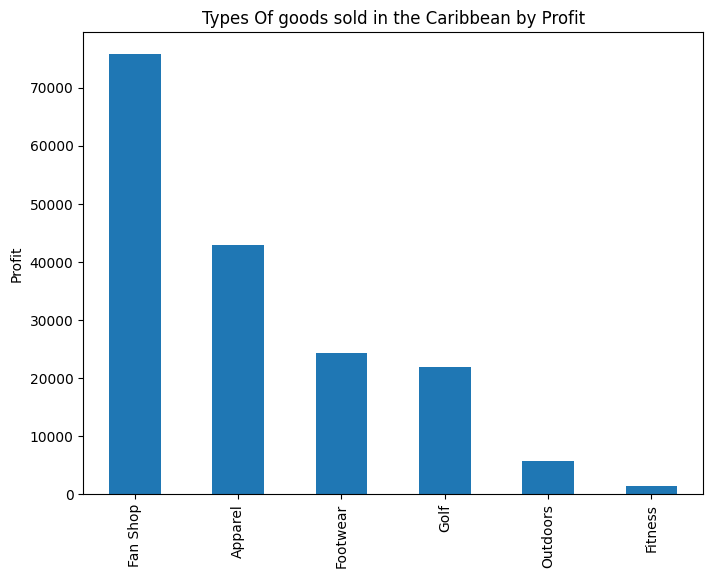

In [65]:
#ploting a bar graph for types Of goods sold in the Western Europe by Profits
df1=df[df['Order Region']=='Caribbean']
df1 = df1.groupby(['Department Name'])['Order Profit Per Order'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the Caribbean by Profit')
plt.xlabel('')
plt.ylabel('Profit')
plt.show()

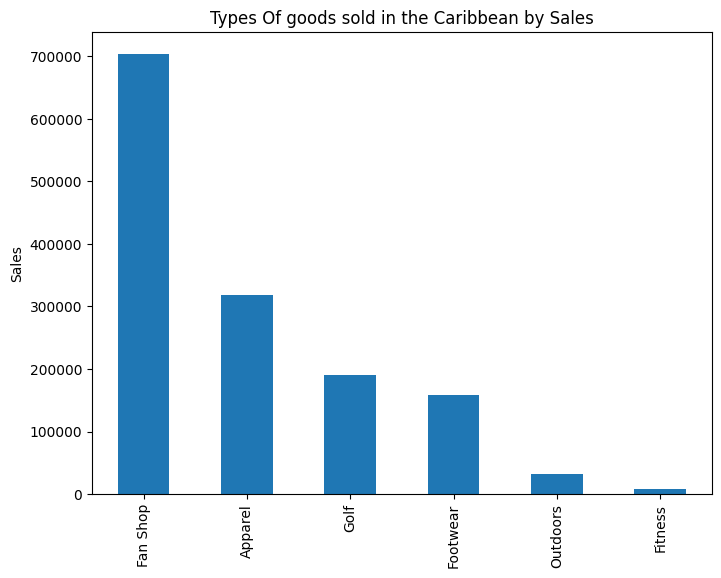

In [66]:
#ploting a bar graph for types Of goods sold in the Central America by Sales
df1=df[df['Order Region']=='West of USA ']
df1 = df1.groupby(['Department Name'])['Order Item Total'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the Caribbean by Sales')
plt.xlabel('')
plt.ylabel('Sales')
plt.show()

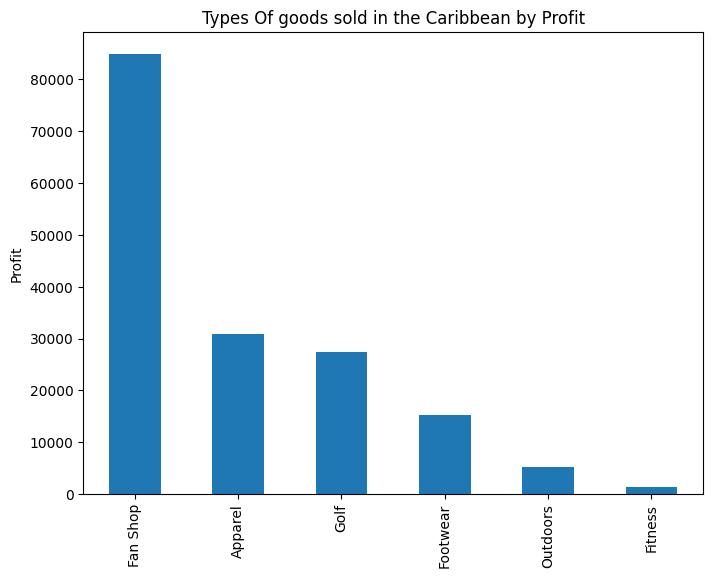

In [67]:
#ploting a bar graph for types Of goods sold in the Western Europe by Profits
df1=df[df['Order Region']=='West of USA ']
df1 = df1.groupby(['Department Name'])['Order Profit Per Order'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the Caribbean by Profit')
plt.xlabel('')
plt.ylabel('Profit')
plt.show()

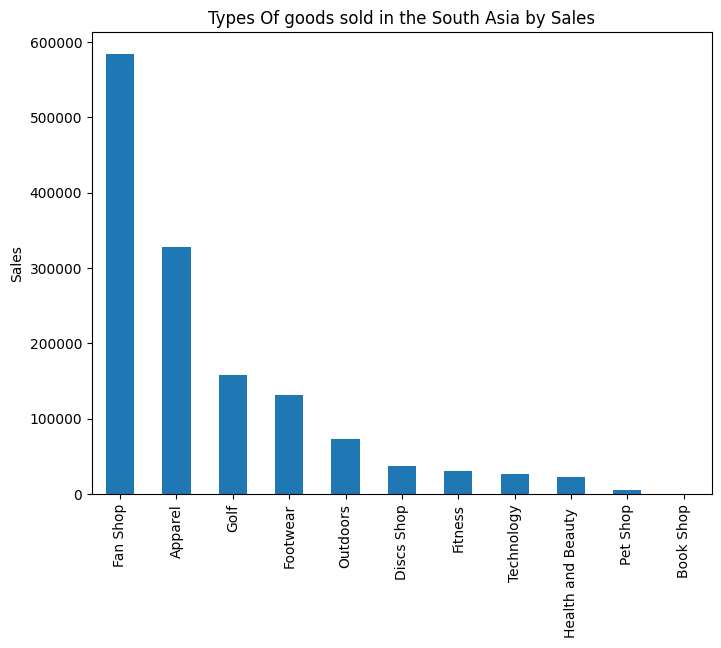

In [68]:
#ploting a bar graph for types Of goods sold in the Central America by Sales
df1=df[df['Order Region']=='South Asia']
df1 = df1.groupby(['Department Name'])['Order Item Total'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the South Asia by Sales')
plt.xlabel('')
plt.ylabel('Sales')
plt.show()

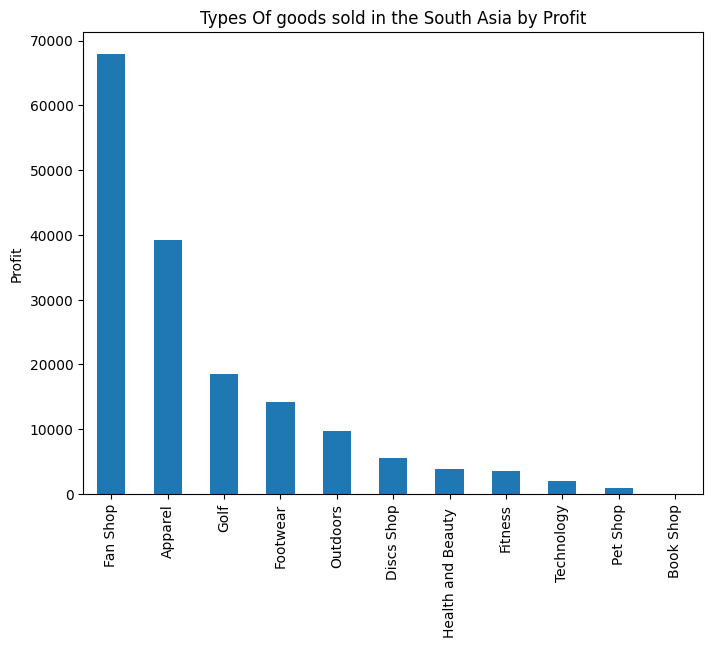

In [69]:
#ploting a bar graph for types Of goods sold in the Western Europe by Profits
df1=df[df['Order Region']=='South Asia']
df1 = df1.groupby(['Department Name'])['Order Profit Per Order'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Types Of goods sold in the South Asia by Profit')
plt.xlabel('')
plt.ylabel('Profit')
plt.show()

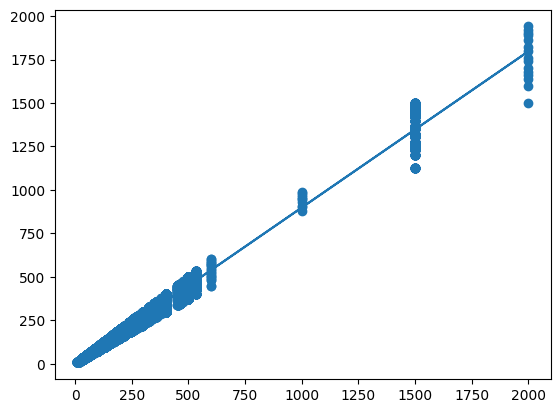

In [70]:
import matplotlib.pyplot as plt
from scipy import stats

x = df['Sales']
y = df['Order Item Total']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

## Shipment Delay Analysis

In [71]:
df["Delivery Status"].unique()

array(['Advance shipping', 'Late delivery', 'Shipping on time',
       'Shipping canceled'], dtype=object)

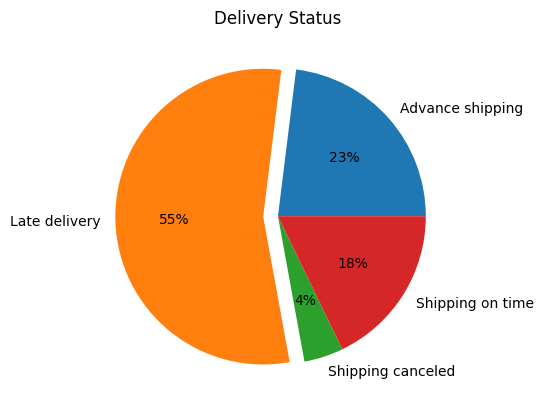

In [72]:
#Ploting a pie chart of delivery status  
df1 = df.groupby(['Delivery Status']).size()

explode=[0, 0.1, 0, 0]
plt.pie(df1.values, labels=df1.index, autopct='%.0f%%', explode=explode)
plt.title("Delivery Status")
plt.show()

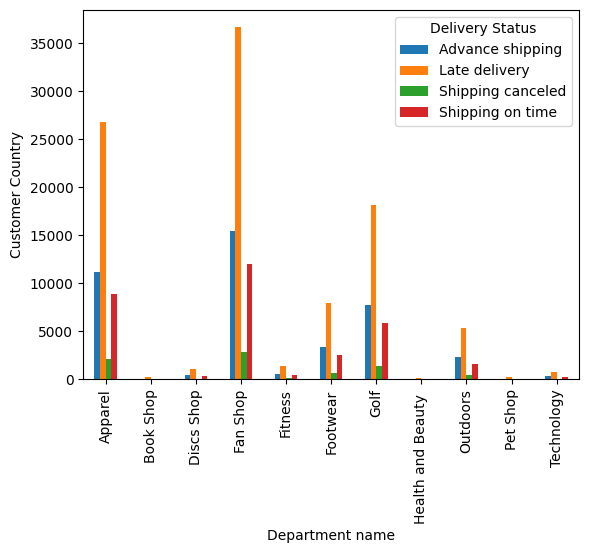

In [73]:
#ploting a bar graph for most profitable regions 
df1=df.groupby(['Department Name','Delivery Status'])['Delivery Status'].count()
df1.unstack(level=1).plot.bar()
plt.xlabel('Department name')
plt.ylabel('Customer Country')
plt.show()

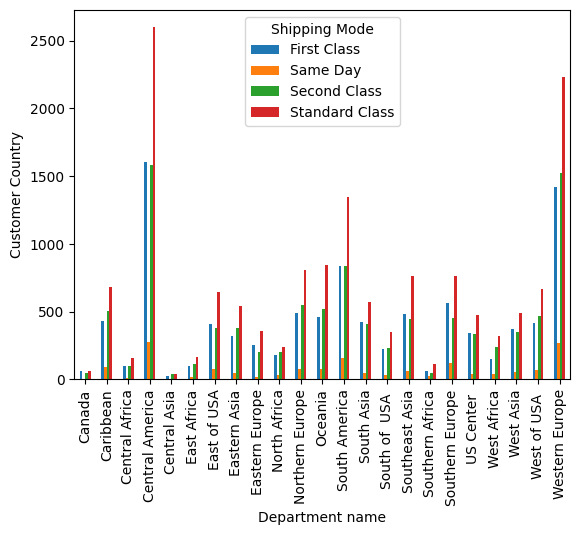

In [74]:
df1=df[df["Department Name"]=='Fan Shop']
df1=df1[df1['Delivery Status']=='Late delivery']
df1 = df1.groupby(['Order Region','Shipping Mode'])['Shipping Mode'].count().sort_values(ascending=False)
df1.unstack(level=1).plot.bar()
plt.xlabel('Department name')
plt.ylabel('Customer Country')
plt.show()

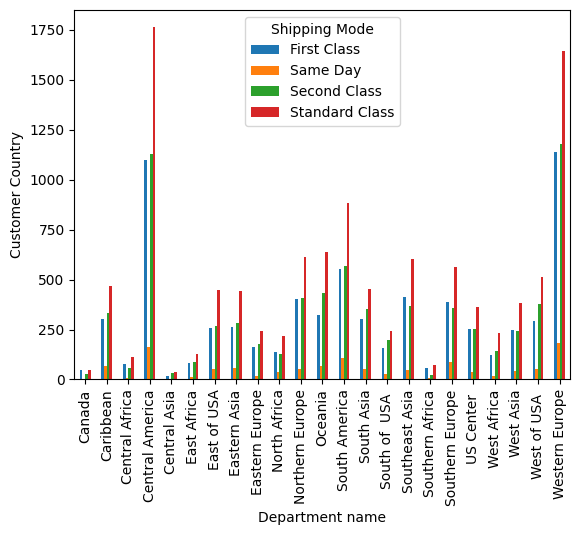

In [75]:
df1=df[df["Department Name"]=='Apparel']
df1=df1[df1['Delivery Status']=='Late delivery']
df1 = df1.groupby(['Order Region','Shipping Mode'])['Shipping Mode'].count().sort_values(ascending=False)
df1.unstack(level=1).plot.bar()
plt.xlabel('Department name')
plt.ylabel('Customer Country')
plt.show()

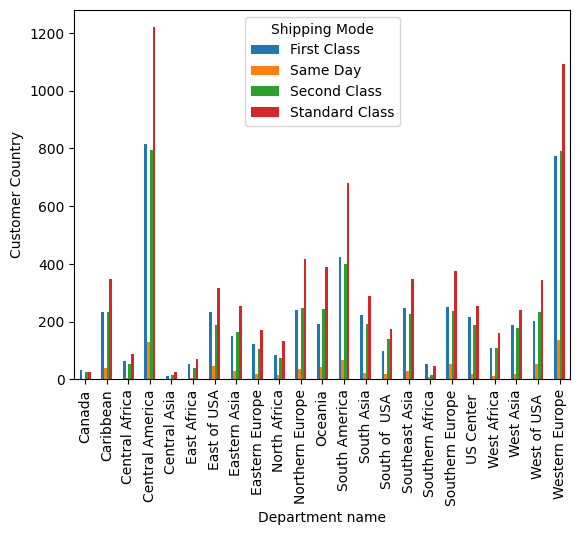

In [76]:
df1=df[df["Department Name"]=='Golf']
df1=df1[df1['Delivery Status']=='Late delivery']
df1 = df1.groupby(['Order Region','Shipping Mode'])['Shipping Mode'].count().sort_values(ascending=False)
df1.unstack(level=1).plot.bar()
plt.xlabel('Department name')
plt.ylabel('Customer Country')
plt.show()

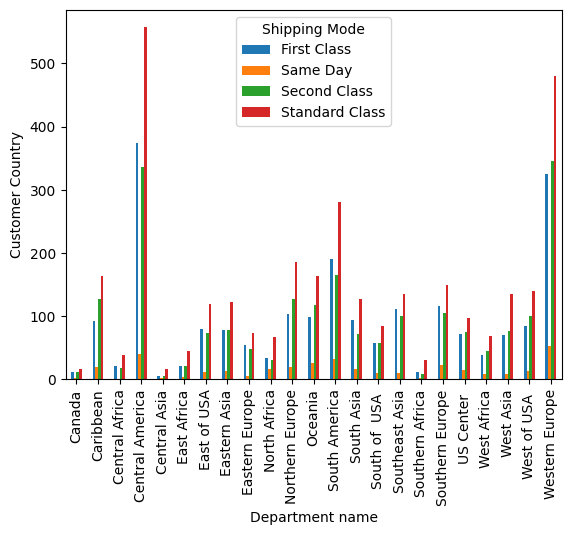

In [77]:
df1=df[df["Department Name"]=='Footwear']
df1=df1[df1['Delivery Status']=='Late delivery']
df1 = df1.groupby(['Order Region','Shipping Mode'])['Shipping Mode'].count().sort_values(ascending=False)
df1.unstack(level=1).plot.bar()
plt.xlabel('Department name')
plt.ylabel('Customer Country')
plt.show()

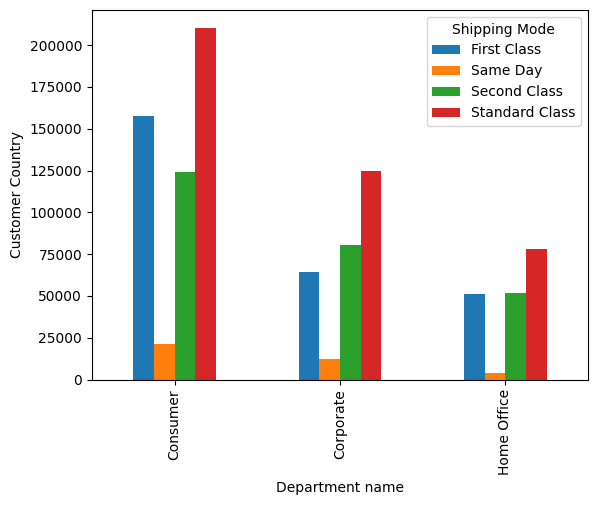

In [78]:
df1=df[df["Department Name"]=='Fan Shop']
df1=df1[df1['Delivery Status']=='Late delivery']
df1 = df1.groupby(['Customer Segment','Shipping Mode'])['Order Profit Per Order'].sum().sort_values(ascending=False)
df1.unstack(level=1).plot.bar()
plt.xlabel('Department name')
plt.ylabel('Customer Country')
plt.show()

## Top 5 Customers overall and region wise

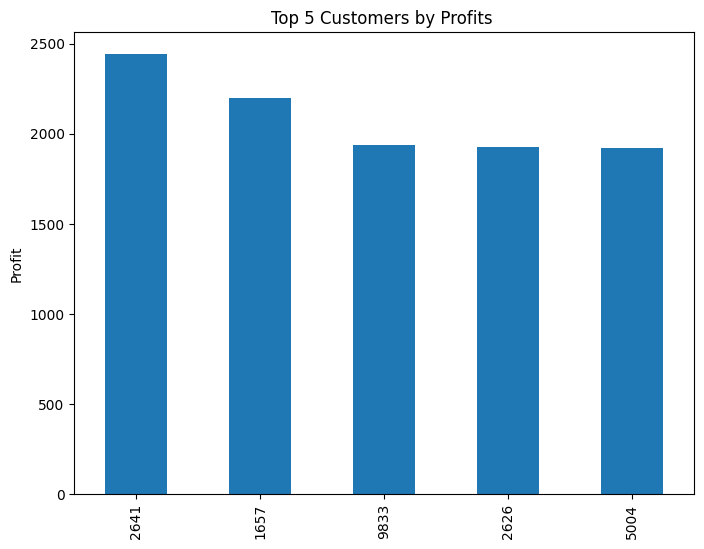

In [79]:
df1 = df.groupby(['Customer Id'])['Order Profit Per Order'].sum().sort_values(ascending=False).head(5)
df1.plot(kind='bar', figsize=(8,6), title='Top 5 Customers by Profits ')
plt.xlabel('')
plt.ylabel('Profit')
plt.show()

In [80]:
df1=df[df['Customer Id']==2641]
df1['Customer Segment'].unique()

array(['Consumer'], dtype=object)

In [81]:
df1=df[df['Customer Id']==1657]
df1['Customer Segment'].unique()

array(['Consumer'], dtype=object)

In [82]:
df1=df[df['Customer Id']==9833]
df1['Customer Segment'].unique()

array(['Consumer'], dtype=object)

In [83]:
df1=df[df['Customer Id']==2626]
df1['Customer Segment'].unique()

array(['Consumer'], dtype=object)

In [84]:
df1=df[df['Customer Id']==5004]
df1['Customer Segment'].unique()

array(['Home Office'], dtype=object)

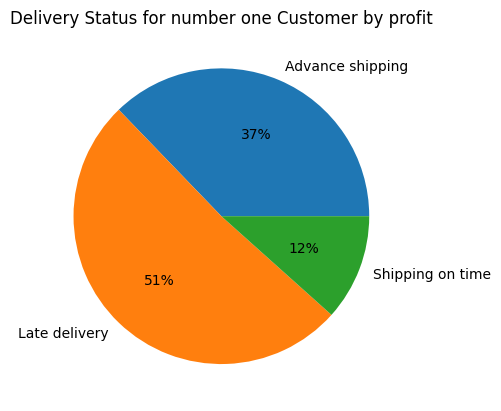

In [85]:
df1=df[df['Customer Id']==2641]
df1 = df1.groupby(['Delivery Status']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Delivery Status for number one Customer by profit")
plt.show()

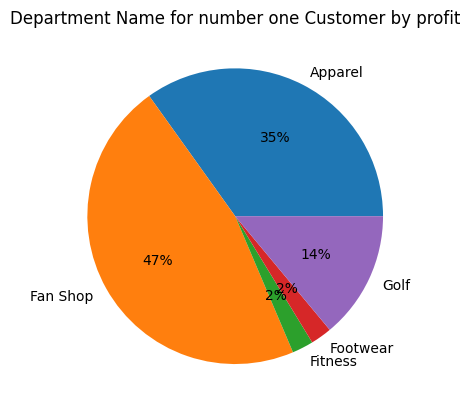

In [86]:
df1=df[df['Customer Id']==2641]
df1 = df1.groupby(['Department Name']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Department Name for number one Customer by profit")
plt.show()

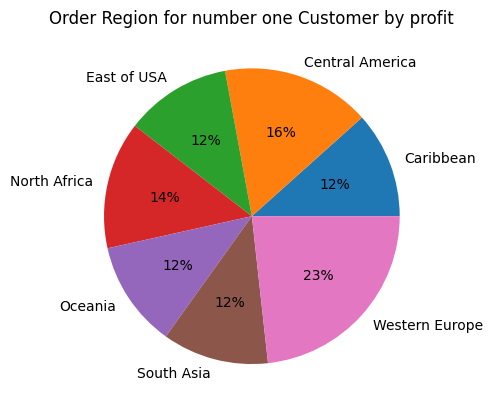

In [87]:
df1=df[df['Customer Id']==2641]
df1 = df1.groupby(['Order Region']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Order Region for number one Customer by profit")
plt.show()

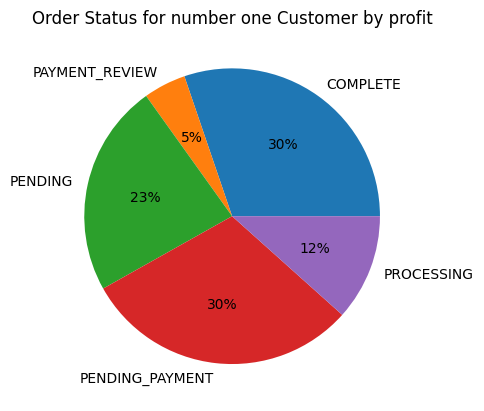

In [88]:
df1=df[df['Customer Id']==2641]
df1 = df1.groupby(['Order Status']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Order Status for number one Customer by profit")
plt.show()

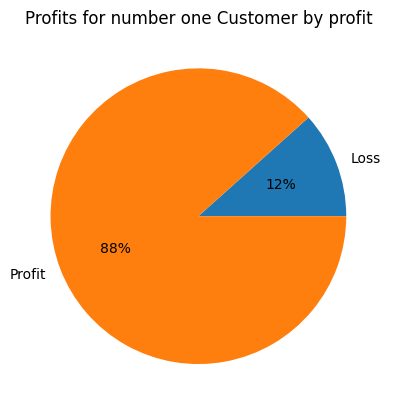

In [89]:
df1=df[df['Customer Id']==2641]
df1 = df1.groupby(['Profits']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Profits for number one Customer by profit")
plt.show()

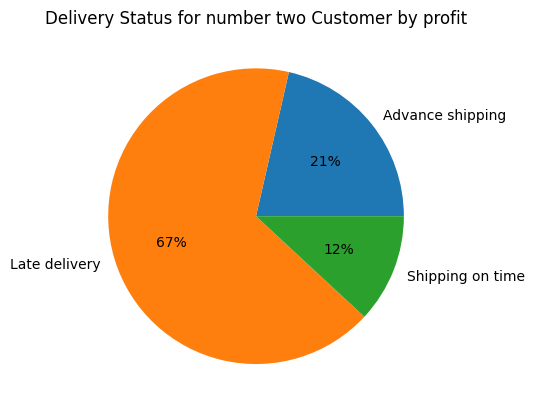

In [90]:
df1=df[df['Customer Id']==1657]
df1 = df1.groupby(['Delivery Status']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Delivery Status for number two Customer by profit")
plt.show()

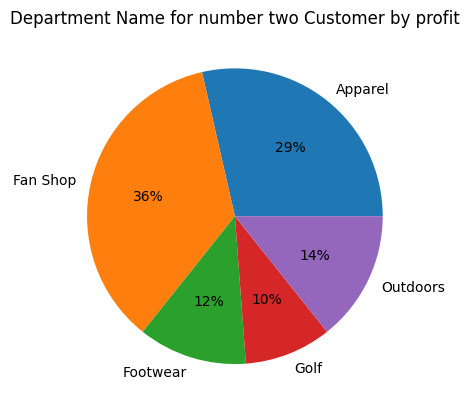

In [91]:
df1=df[df['Customer Id']==1657]
df1 = df1.groupby(['Department Name']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Department Name for number two Customer by profit")
plt.show()

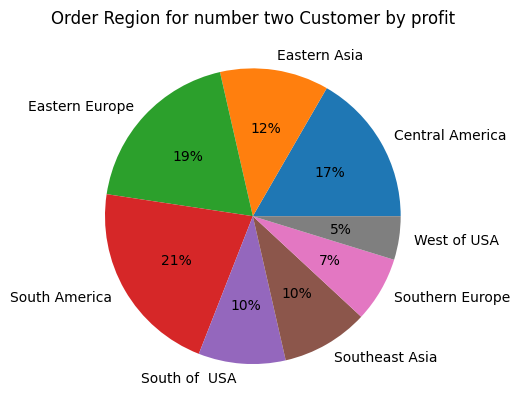

In [92]:
df1=df[df['Customer Id']==1657]
df1 = df1.groupby(['Order Region']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Order Region for number two Customer by profit")
plt.show()

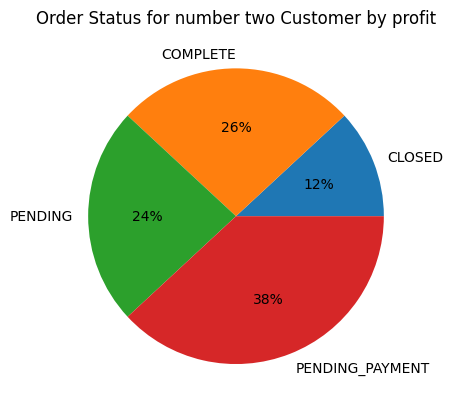

In [93]:
df1=df[df['Customer Id']==1657]
df1 = df1.groupby(['Order Status']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Order Status for number two Customer by profit")
plt.show()

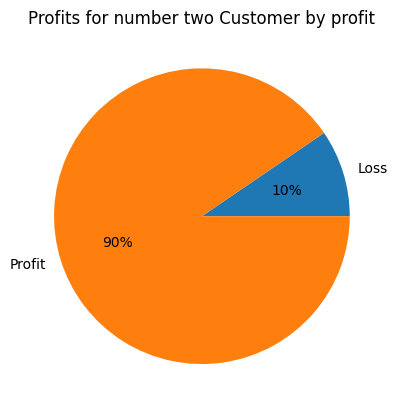

In [94]:
df1=df[df['Customer Id']==1657]
df1 = df1.groupby(['Profits']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Profits for number two Customer by profit")
plt.show()

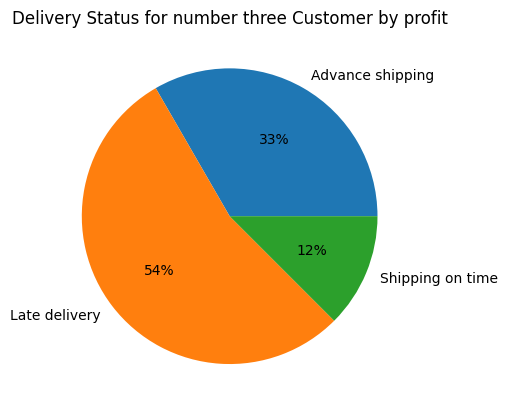

In [95]:
df1=df[df['Customer Id']==9833]
df1 = df1.groupby(['Delivery Status']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Delivery Status for number three Customer by profit")
plt.show()

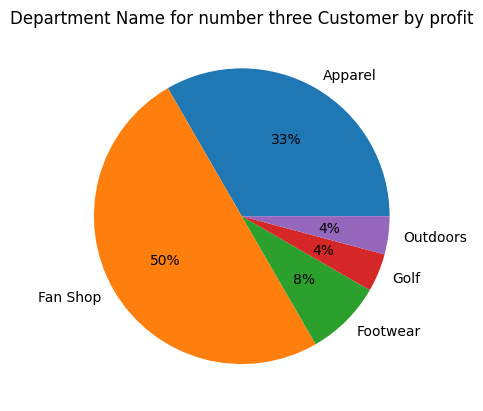

In [96]:
df1=df[df['Customer Id']==9833]
df1 = df1.groupby(['Department Name']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Department Name for number three Customer by profit")
plt.show()

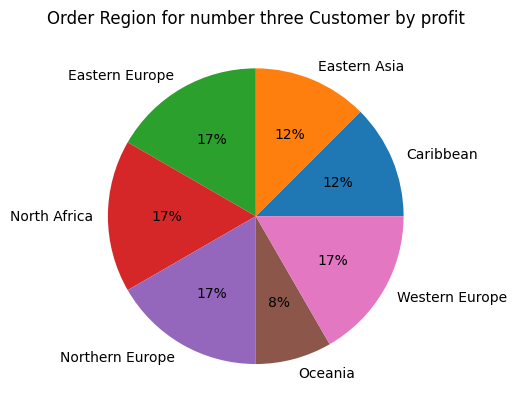

In [97]:
df1=df[df['Customer Id']==9833]
df1 = df1.groupby(['Order Region']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Order Region for number three Customer by profit")
plt.show()

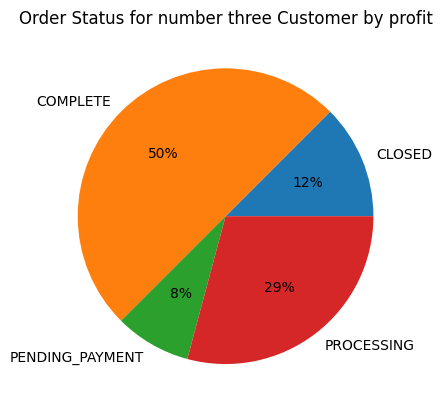

In [98]:
df1=df[df['Customer Id']==9833]
df1 = df1.groupby(['Order Status']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Order Status for number three Customer by profit")
plt.show()

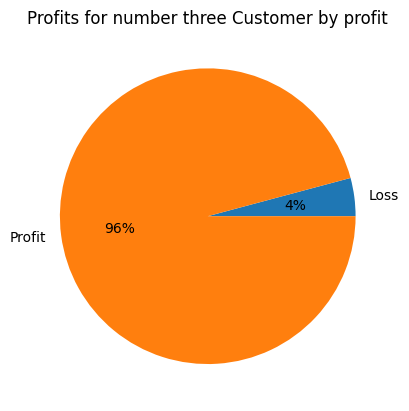

In [99]:
df1=df[df['Customer Id']==9833]
df1 = df1.groupby(['Profits']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Profits for number three Customer by profit")
plt.show()

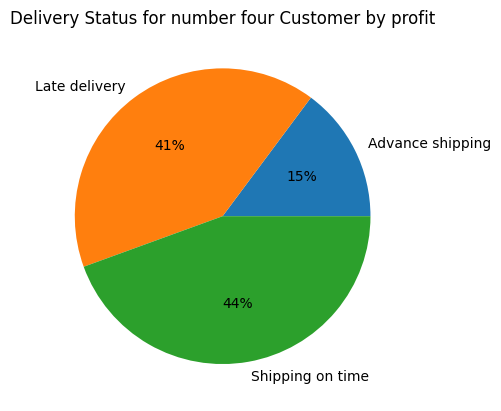

In [100]:
df1=df[df['Customer Id']==2626]
df1 = df1.groupby(['Delivery Status']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Delivery Status for number four Customer by profit")
plt.show()

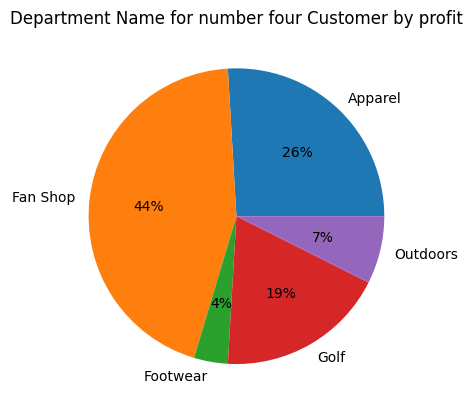

In [101]:
df1=df[df['Customer Id']==2626]
df1 = df1.groupby(['Department Name']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Department Name for number four Customer by profit")
plt.show()

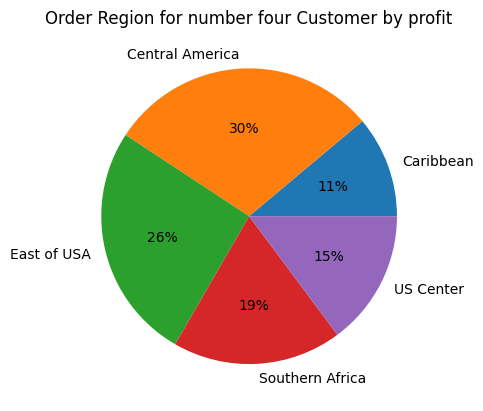

In [102]:
df1=df[df['Customer Id']==2626]
df1 = df1.groupby(['Order Region']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Order Region for number four Customer by profit")
plt.show()

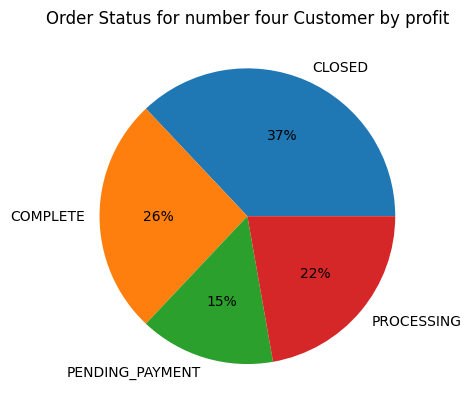

In [103]:
df1=df[df['Customer Id']==2626]
df1 = df1.groupby(['Order Status']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title('Order Status for number four Customer by profit')
plt.show()

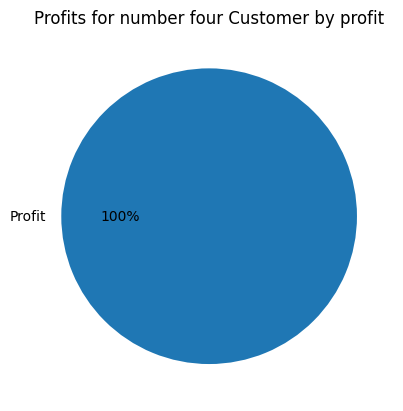

In [104]:
df1=df[df['Customer Id']==2626]
df1 = df1.groupby(['Profits']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title('Profits for number four Customer by profit')
plt.show()

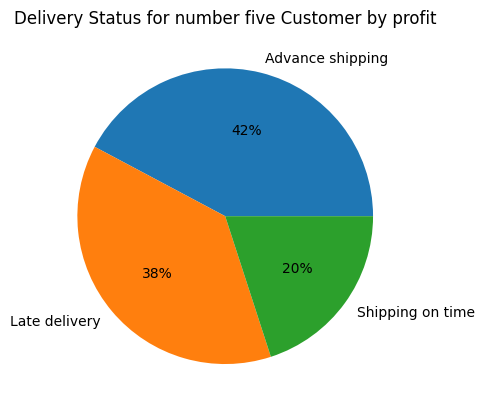

In [105]:
df1=df[df['Customer Id']==5004]
df1 = df1.groupby(['Delivery Status']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Delivery Status for number five Customer by profit")
plt.show()

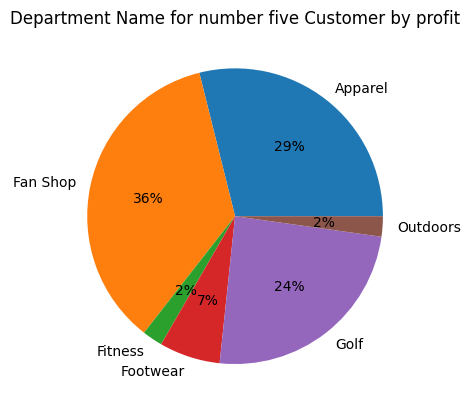

In [106]:
df1=df[df['Customer Id']==5004]
df1 = df1.groupby(['Department Name']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Department Name for number five Customer by profit")
plt.show()

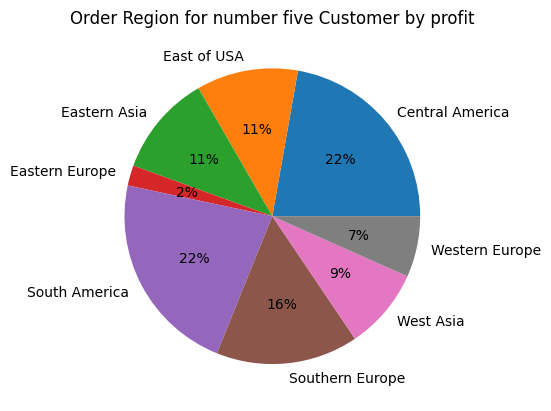

In [107]:
df1=df[df['Customer Id']==5004]
df1 = df1.groupby(['Order Region']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Order Region for number five Customer by profit")
plt.show()

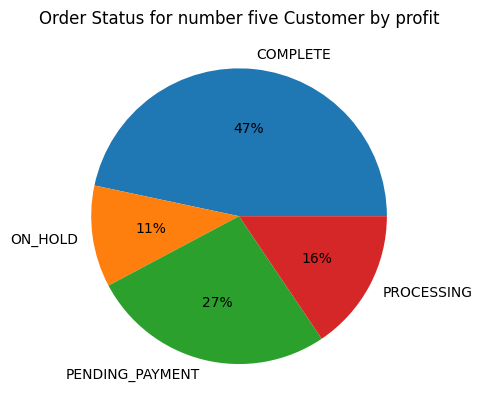

In [108]:
df1=df[df['Customer Id']==5004]
df1 = df1.groupby(['Order Status']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Order Status for number five Customer by profit")
plt.show()

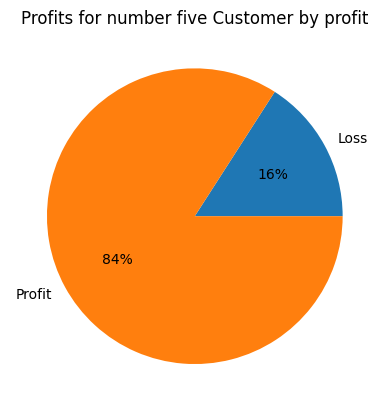

In [109]:
df1=df[df['Customer Id']==5004]
df1 = df1.groupby(['Profits']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Profits for number five Customer by profit")
plt.show()

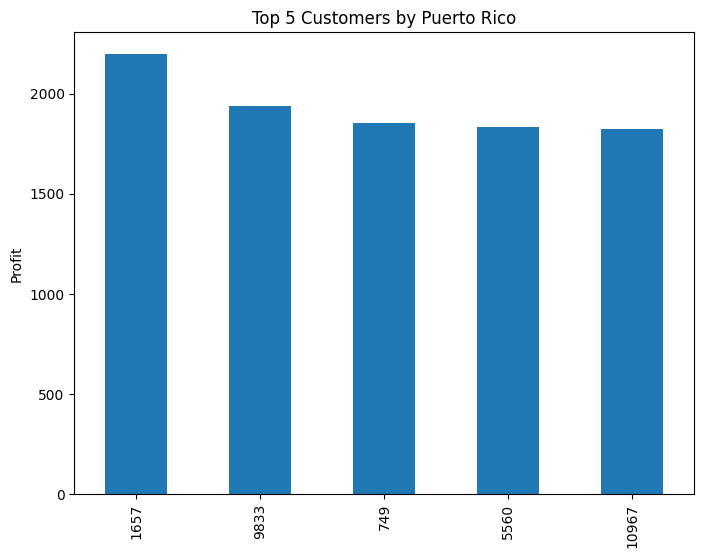

In [110]:
df1=df[df['Customer Country']=='Puerto Rico']
df1 = df1.groupby(['Customer Id'])['Order Profit Per Order'].sum().sort_values(ascending=False).head(5)
df1.plot(kind='bar', figsize=(8,6), title='Top 5 Customers by Puerto Rico')
plt.xlabel('')
plt.ylabel('Profit')
plt.show()

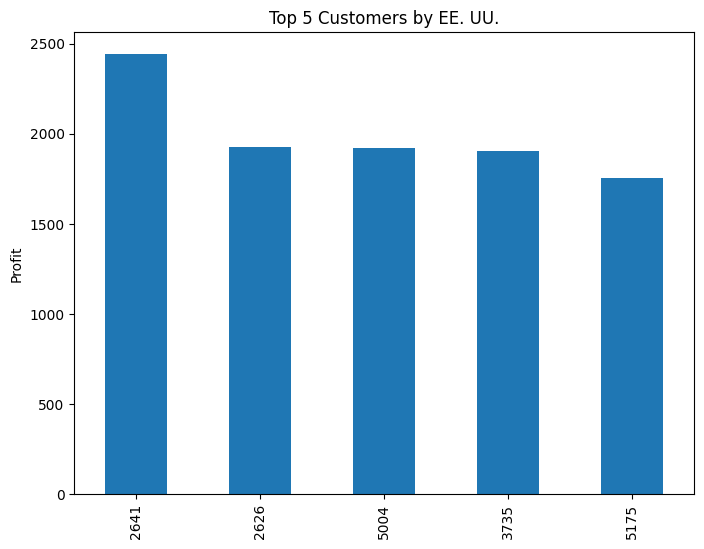

In [111]:
df1=df[df['Customer Country']!='Puerto Rico']
df1 = df1.groupby(['Customer Id'])['Order Profit Per Order'].sum().sort_values(ascending=False).head(5)
df1.plot(kind='bar', figsize=(8,6), title='Top 5 Customers by EE. UU.')
plt.xlabel('')
plt.ylabel('Profit')
plt.show()

## Fraud Analysis

In [112]:
df['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

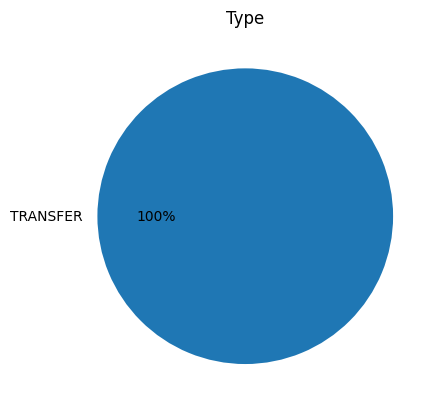

In [113]:
df1=df[df['Order Status']=='SUSPECTED_FRAUD']
df1 = df1.groupby(['Type']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Type")
plt.show()

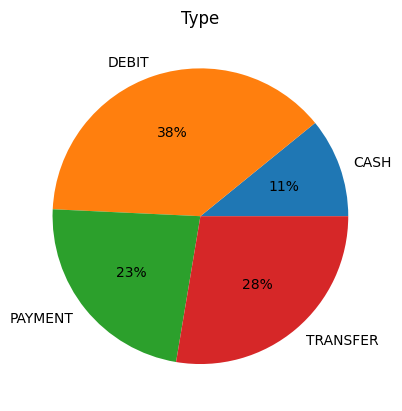

In [114]:
df1 = df.groupby(['Type']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Type")
plt.show()

<Axes: xlabel='Type'>

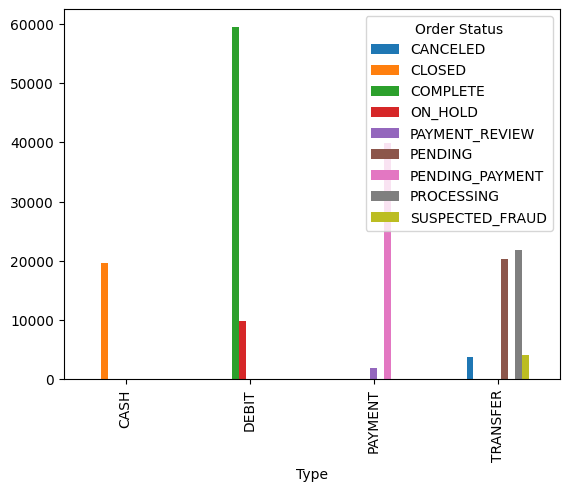

In [115]:
df1 = df.groupby(['Order Status','Type'])['Type'].count()
df1.unstack(level=0).plot.bar()

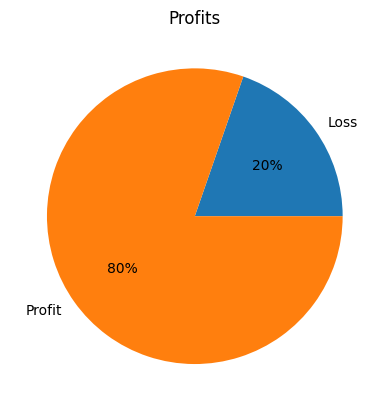

In [116]:
df1=df[df['Order Status']=='SUSPECTED_FRAUD']
df1 = df1.groupby(['Profits']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Profits")
plt.show()

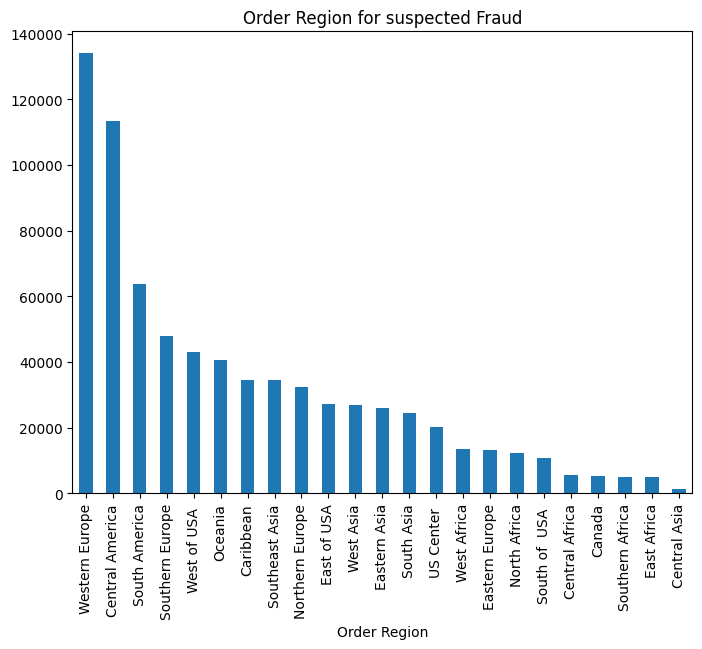

In [117]:
df1=df[df['Order Status']=='SUSPECTED_FRAUD']
df1 = df1.groupby(['Order Region'])['Order Item Total'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Order Region for suspected Fraud')
plt.xlabel('Order Region')
plt.ylabel('')
plt.show()

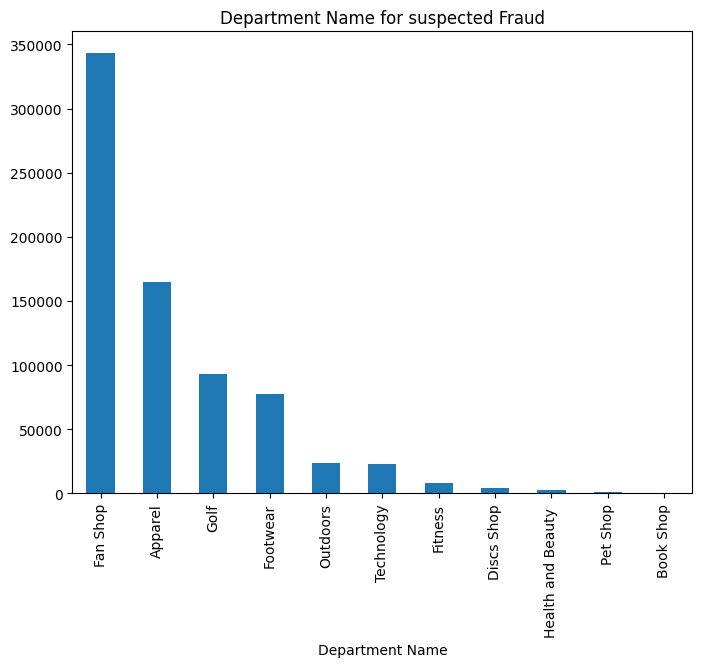

In [118]:
df1=df[df['Order Status']=='SUSPECTED_FRAUD']
df1 = df1.groupby(['Department Name'])['Order Item Total'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Department Name for suspected Fraud')
plt.xlabel('Department Name')
plt.ylabel('')
plt.show()

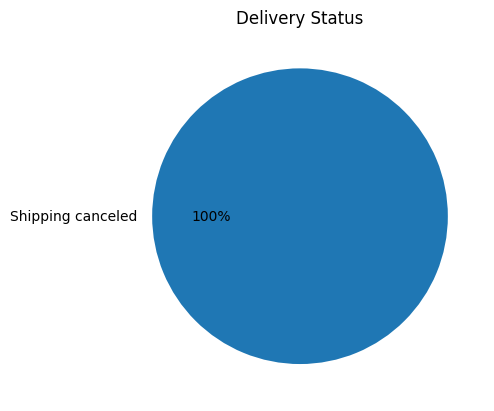

In [119]:
df1=df[df['Order Status']=='SUSPECTED_FRAUD']
df1 = df1.groupby(['Delivery Status'])['Order Item Total'].sum().sort_values(ascending=False)

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Delivery Status")
plt.show()

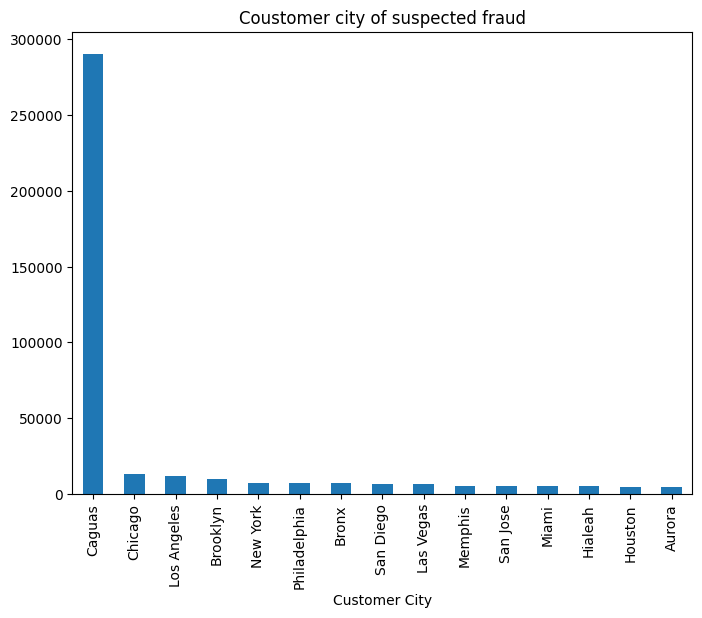

In [120]:
df1=df[df['Order Status']=='SUSPECTED_FRAUD']
df1 = df1.groupby(['Customer City'])['Order Item Total'].sum().sort_values(ascending=False).head(15)
df1.plot(kind='bar', figsize=(8,6), title='Coustomer city of suspected fraud')
plt.xlabel('Customer City')
plt.ylabel('')
plt.show()

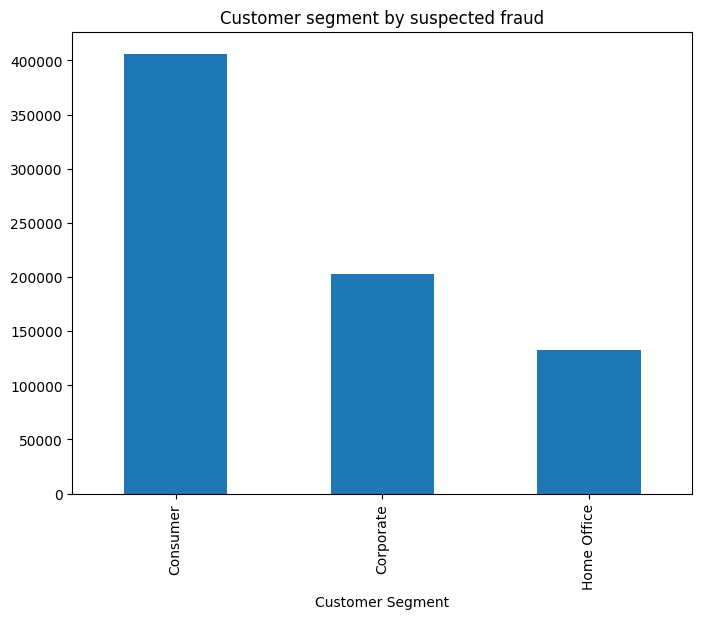

In [121]:
df1=df[df['Order Status']=='SUSPECTED_FRAUD']
df1 = df1.groupby(['Customer Segment'])['Order Item Total'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Customer segment by suspected fraud')
plt.xlabel('Customer Segment')
plt.ylabel('')
plt.show()

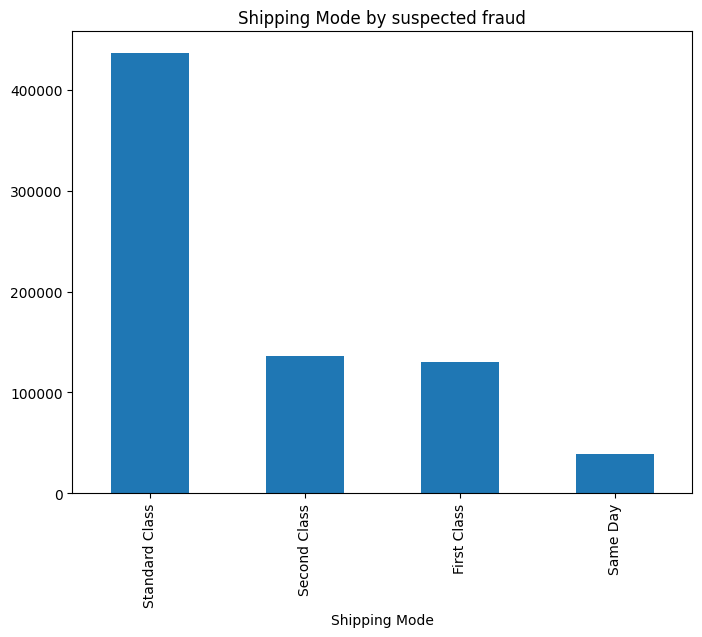

In [122]:
df1=df[df['Order Status']=='SUSPECTED_FRAUD']
df1 = df1.groupby(['Shipping Mode'])['Order Item Total'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Shipping Mode by suspected fraud')
plt.xlabel('Shipping Mode')
plt.ylabel('')
plt.show()

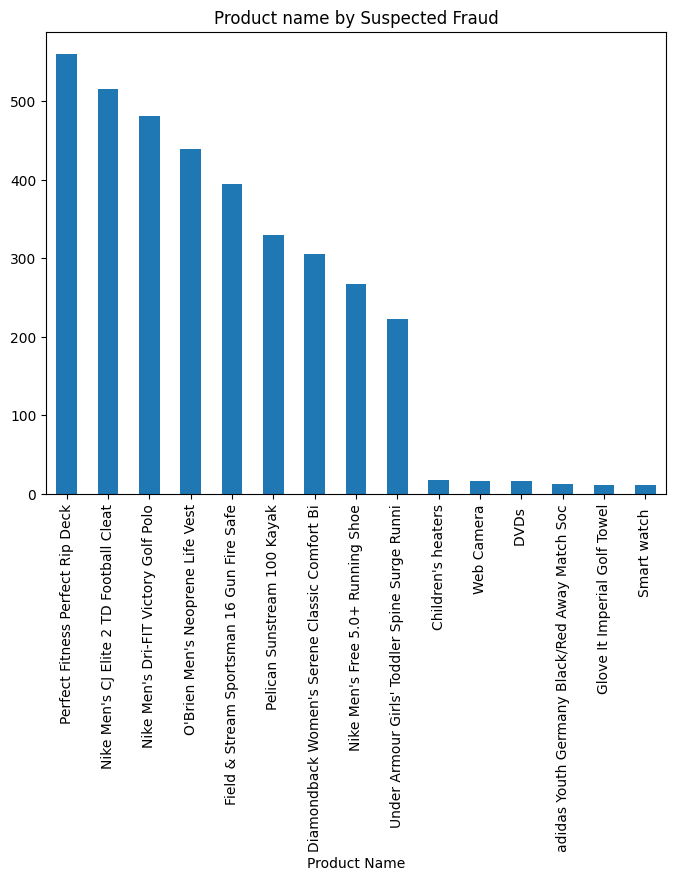

In [123]:
df1=df[df['Order Status']=='SUSPECTED_FRAUD']
df1 = df1.groupby(['Product Name']).size().sort_values(ascending=False).head(15)
df1.plot(kind='bar', figsize=(8,6), title='Product name by Suspected Fraud')
plt.xlabel('Product Name')
plt.ylabel('')
plt.show()

## Customer segment Analysis

In [124]:
df['Customer Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

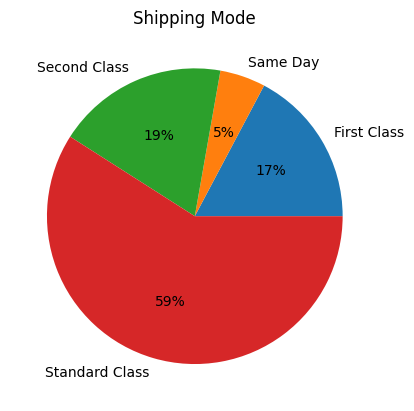

In [125]:
df1=df[df['Customer Segment']=='Consumer']
df1 = df1.groupby(['Shipping Mode'])['Order Profit Per Order'].sum()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Shipping Mode")
plt.show()

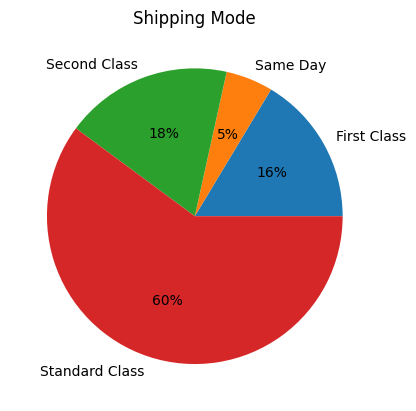

In [126]:
df1=df[df['Customer Segment']=='Home Office']
df1 = df1.groupby(['Shipping Mode'])['Order Profit Per Order'].sum()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Shipping Mode")
plt.show()

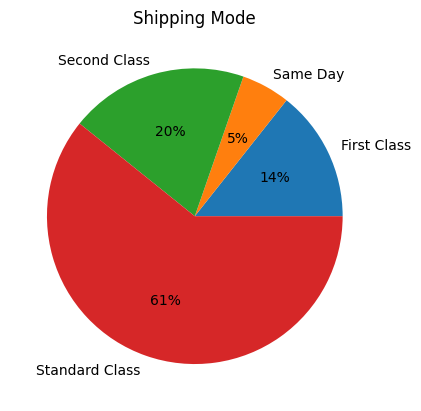

In [127]:
df1=df[df['Customer Segment']=='Corporate']
df1 = df1.groupby(['Shipping Mode'])['Order Profit Per Order'].sum()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Shipping Mode")
plt.show()

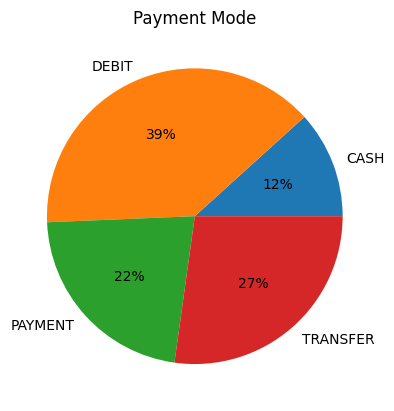

In [128]:
df1=df[df['Customer Segment']=='Consumer']
df1 = df1.groupby(['Type'])['Order Profit Per Order'].sum()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Payment Mode")
plt.show()

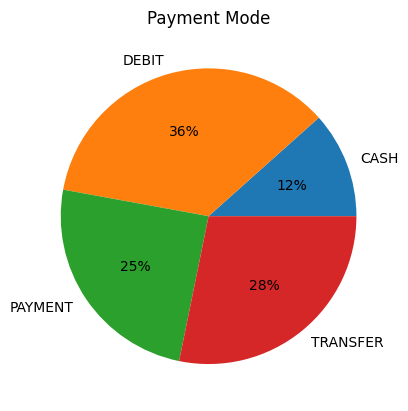

In [129]:
df1=df[df['Customer Segment']=='Home Office']
df1 = df1.groupby(['Type'])['Order Profit Per Order'].sum()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Payment Mode")
plt.show()

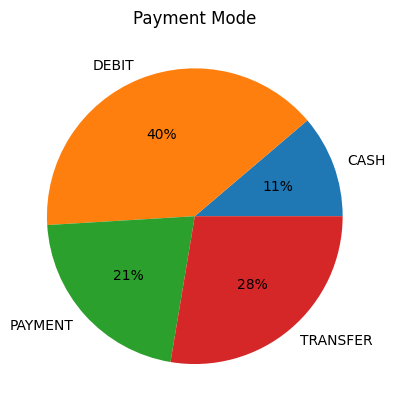

In [130]:
df1=df[df['Customer Segment']=='Corporate']
df1 = df1.groupby(['Type'])['Order Profit Per Order'].sum()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Payment Mode")
plt.show()

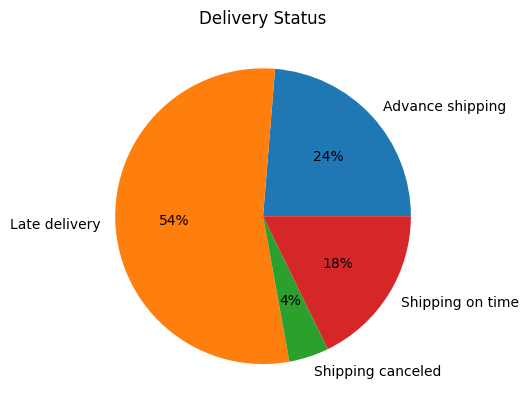

In [131]:
df1=df[df['Customer Segment']=='Consumer']
df1 = df1.groupby(['Delivery Status'])['Order Profit Per Order'].sum()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Delivery Status")
plt.show()

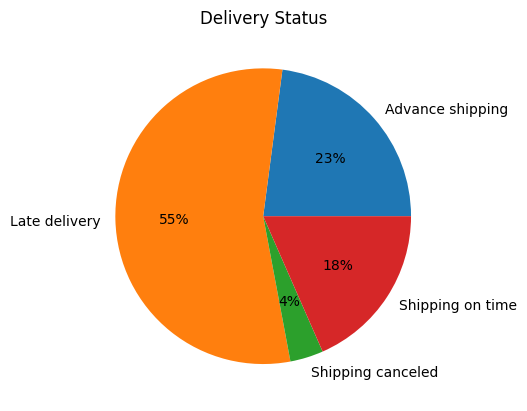

In [132]:
df1=df[df['Customer Segment']=='Home Office']
df1 = df1.groupby(['Delivery Status'])['Order Profit Per Order'].sum()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Delivery Status")
plt.show()

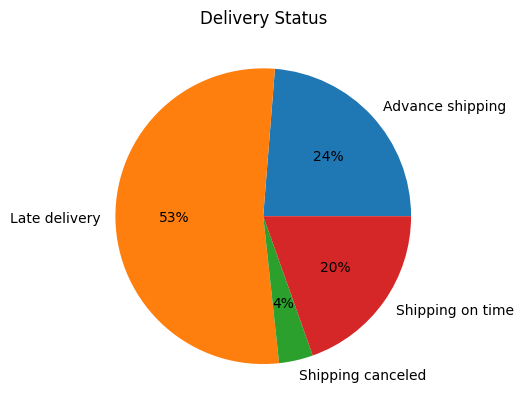

In [133]:
df1=df[df['Customer Segment']=='Corporate']
df1 = df1.groupby(['Delivery Status'])['Order Profit Per Order'].sum()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Delivery Status")
plt.show()

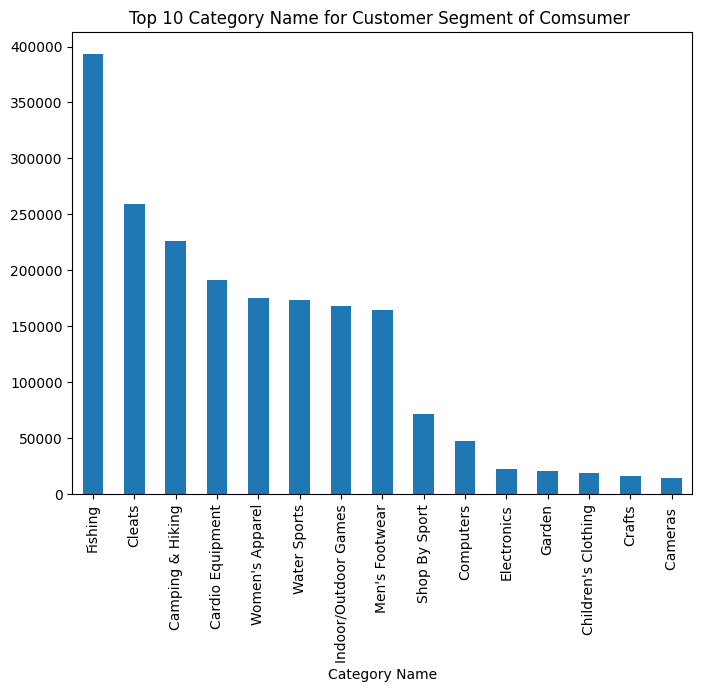

In [134]:
df1=df[df['Customer Segment']=='Consumer']
df1 = df1.groupby(['Category Name'])['Order Profit Per Order'].sum().sort_values(ascending=False).head(15)
df1.plot(kind='bar', figsize=(8,6), title='Top 10 Category Name for Customer Segment of Comsumer ')
plt.xlabel('Category Name')
plt.ylabel('')
plt.show()

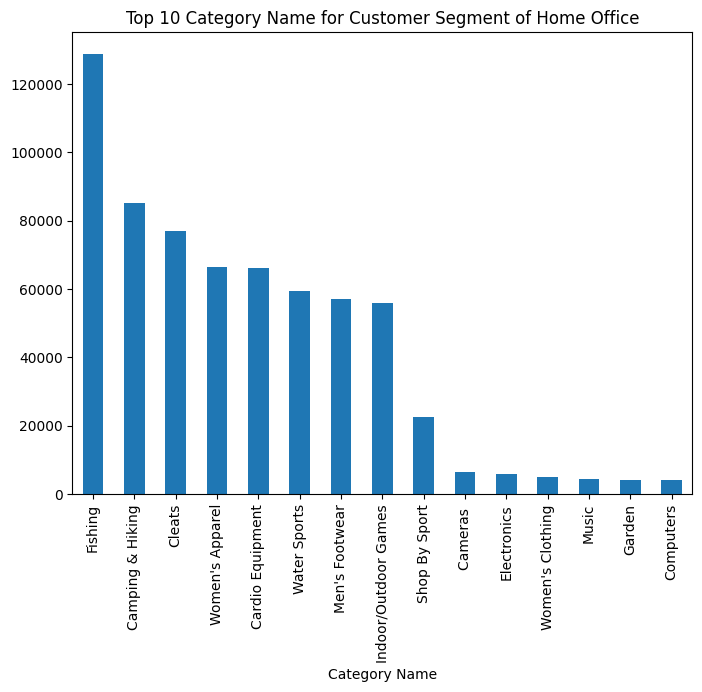

In [135]:
df1=df[df['Customer Segment']=='Home Office']
df1 = df1.groupby(['Category Name'])['Order Profit Per Order'].sum().sort_values(ascending=False).head(15)
df1.plot(kind='bar', figsize=(8,6), title='Top 10 Category Name for Customer Segment of Home Office')
plt.xlabel('Category Name')
plt.ylabel('')
plt.show()

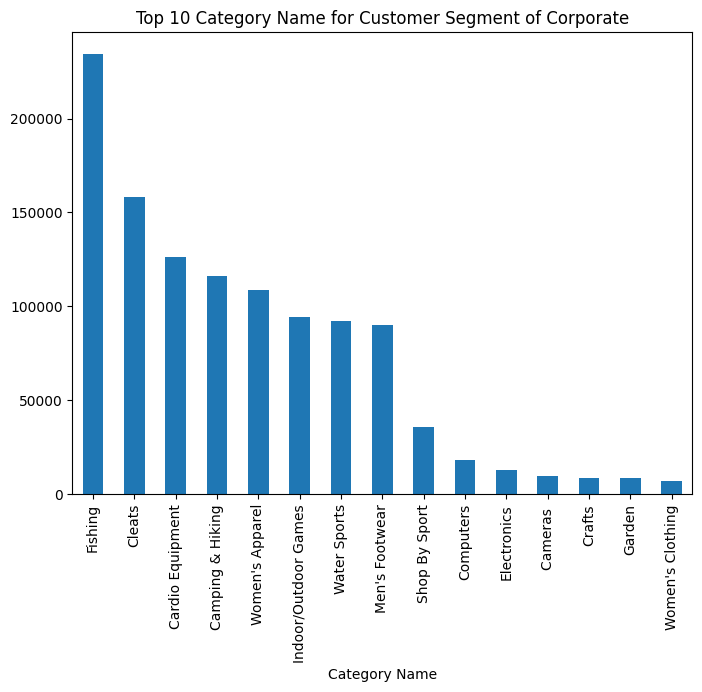

In [136]:
df1=df[df['Customer Segment']=='Corporate']
df1 = df1.groupby(['Category Name'])['Order Profit Per Order'].sum().sort_values(ascending=False).head(15)
df1.plot(kind='bar', figsize=(8,6), title='Top 10 Category Name for Customer Segment of Corporate')
plt.xlabel('Category Name')
plt.ylabel('')
plt.show()

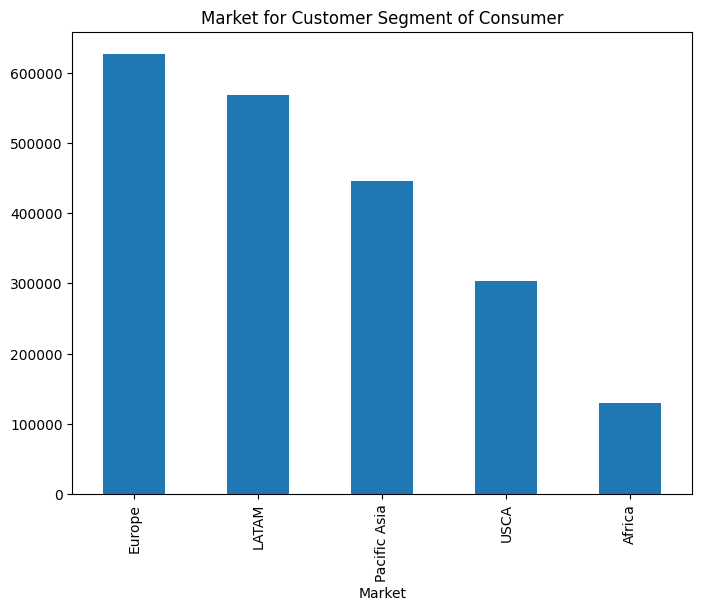

In [137]:
df1=df[df['Customer Segment']=='Consumer']
df1 = df1.groupby(['Market'])['Order Profit Per Order'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Market for Customer Segment of Consumer')
plt.xlabel('Market')
plt.ylabel('')
plt.show()

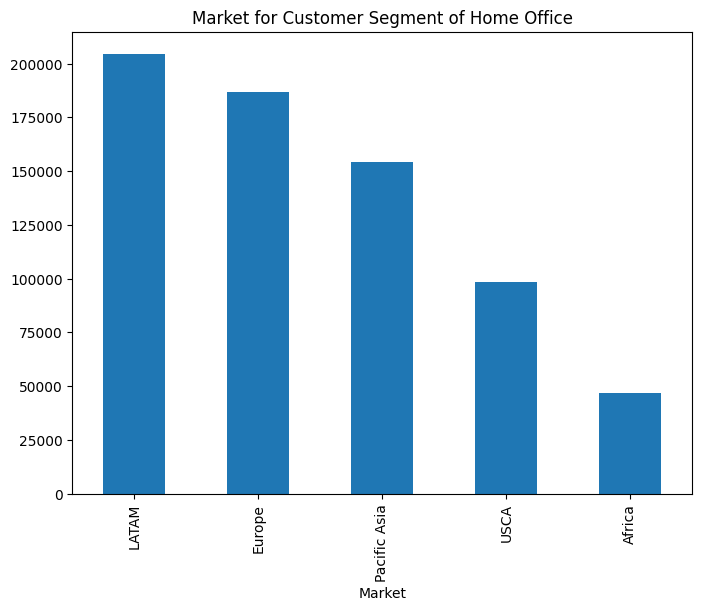

In [138]:
df1=df[df['Customer Segment']=='Home Office']
df1 = df1.groupby(['Market'])['Order Profit Per Order'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Market for Customer Segment of Home Office')
plt.xlabel('Market')
plt.ylabel('')
plt.show()

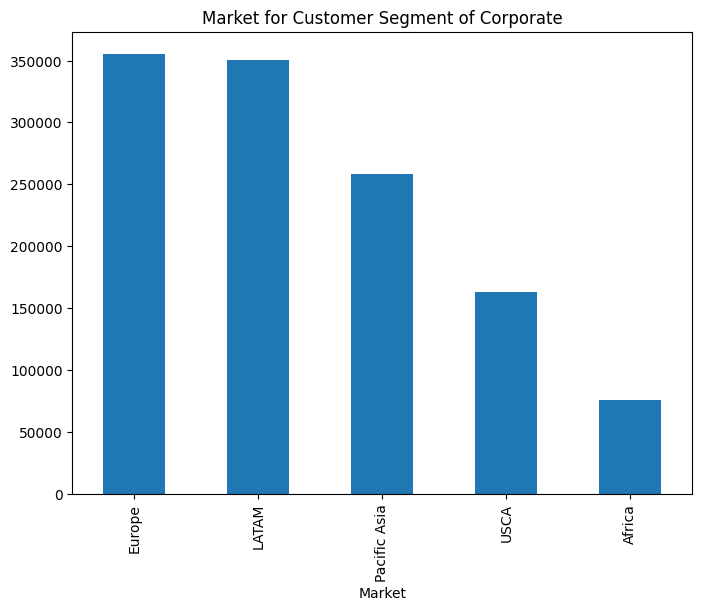

In [139]:
df1=df[df['Customer Segment']=='Corporate']
df1 = df1.groupby(['Market'])['Order Profit Per Order'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Market for Customer Segment of Corporate')
plt.xlabel('Market')
plt.ylabel('')
plt.show()

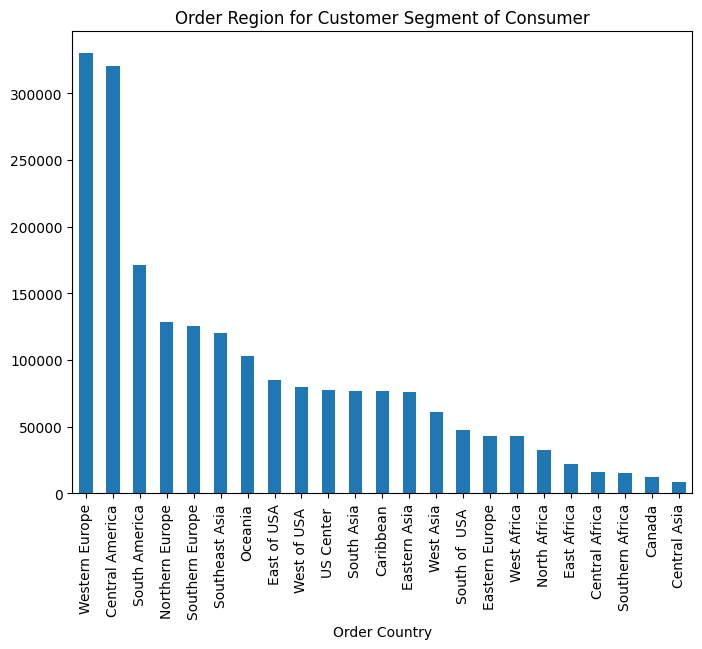

In [140]:
df1=df[df['Customer Segment']=='Consumer']
df1 = df1.groupby(['Order Region'])['Order Profit Per Order'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Order Region for Customer Segment of Consumer')
plt.xlabel('Order Country')
plt.ylabel('')
plt.show()

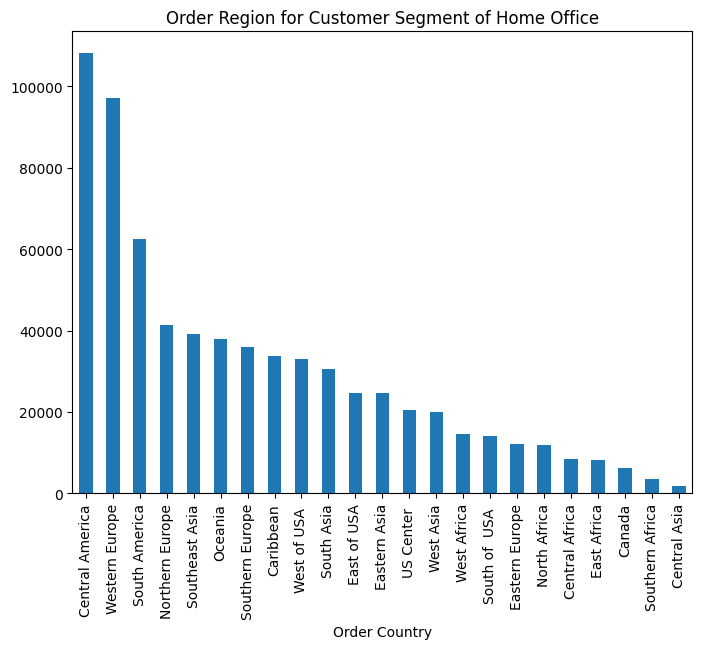

In [141]:
df1=df[df['Customer Segment']=='Home Office']
df1 = df1.groupby(['Order Region'])['Order Profit Per Order'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Order Region for Customer Segment of Home Office')
plt.xlabel('Order Country')
plt.ylabel('')
plt.show()

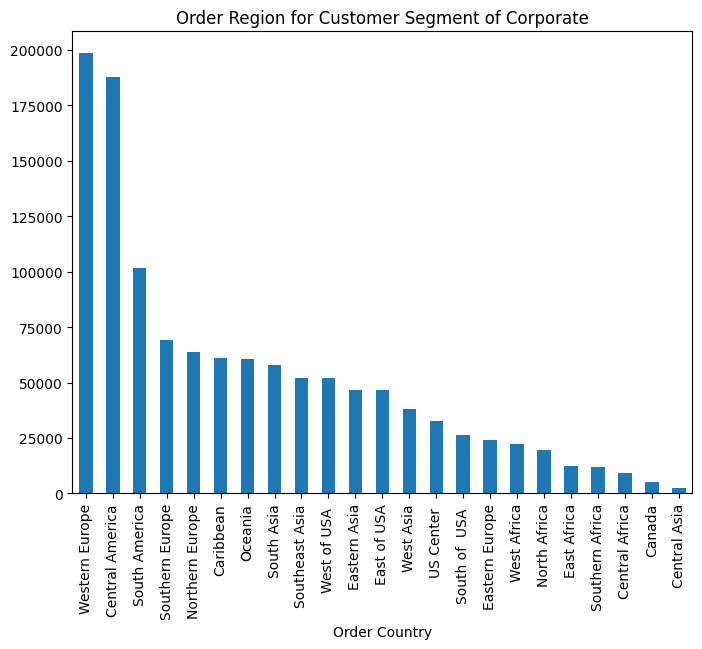

In [142]:
df1=df[df['Customer Segment']=='Corporate']
df1 = df1.groupby(['Order Region'])['Order Profit Per Order'].sum().sort_values(ascending=False)
df1.plot(kind='bar', figsize=(8,6), title='Order Region for Customer Segment of Corporate')
plt.xlabel('Order Country')
plt.ylabel('')
plt.show()

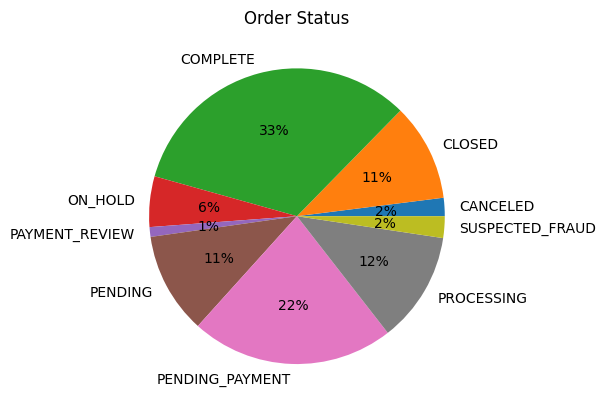

In [143]:
df1=df[df['Customer Segment']=='Consumer']
df1 = df1.groupby(['Order Status']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Order Status")
plt.show() #use pie chart

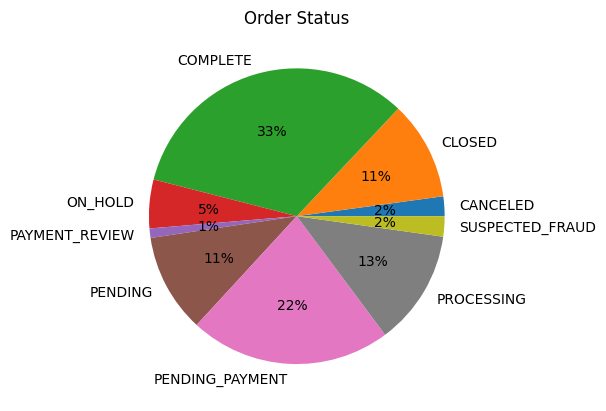

In [144]:
df1=df[df['Customer Segment']=='Home Office']
df1 = df1.groupby(['Order Status']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Order Status")
plt.show()

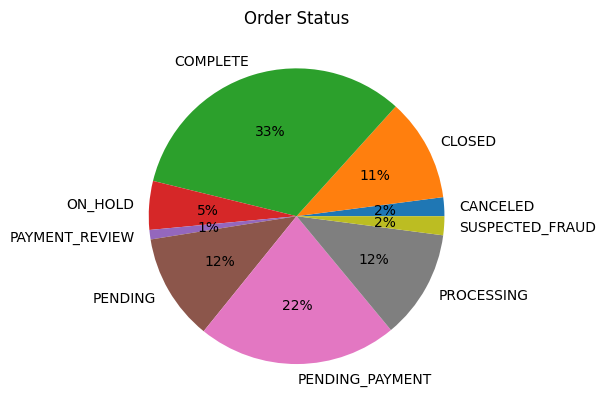

In [145]:
df1=df[df['Customer Segment']=='Corporate']
df1 = df1.groupby(['Order Status']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Order Status")
plt.show()

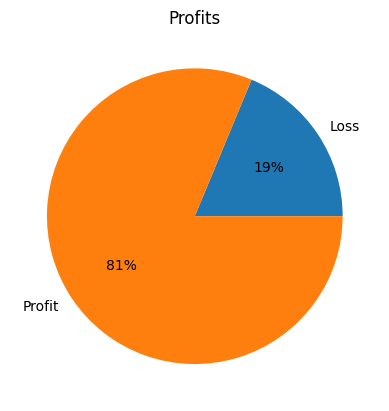

In [146]:
df1=df[df['Customer Segment']=='Consumer']
df1 = df1.groupby(['Profits']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Profits")
plt.show() #use pie chart

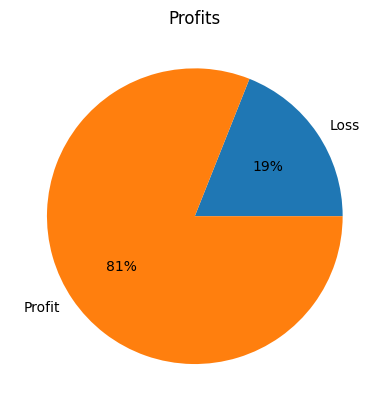

In [147]:
df1=df[df['Customer Segment']=='Home Office']
df1 = df1.groupby(['Profits']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Profits")
plt.show()

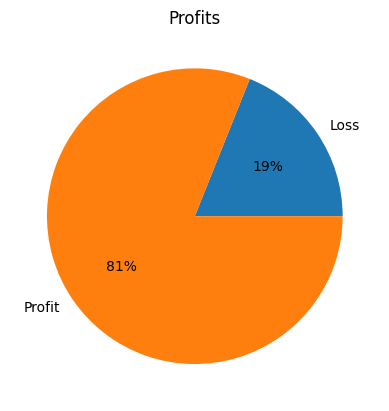

In [148]:
df1=df[df['Customer Segment']=='Corporate']
df1 = df1.groupby(['Profits']).size()

plt.pie(df1.values, labels=df1.index, autopct='%.0f%%')
plt.title("Profits")
plt.show()